In [17]:
import importnb
import cv2 as cv
import os
from Model_Utilities import *
from commonfunctions import *

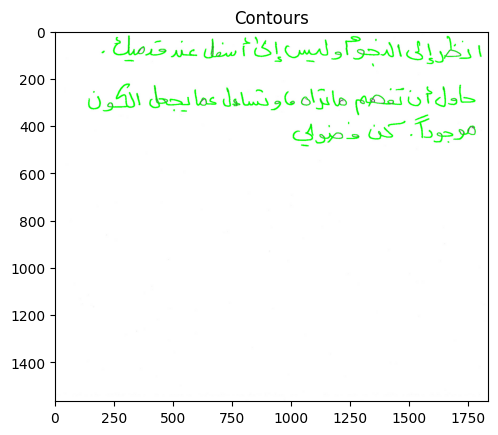

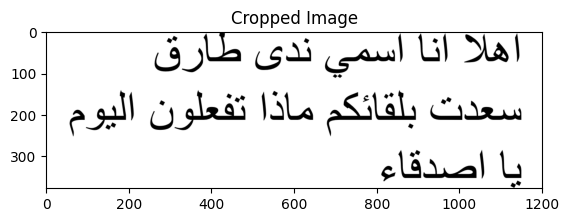

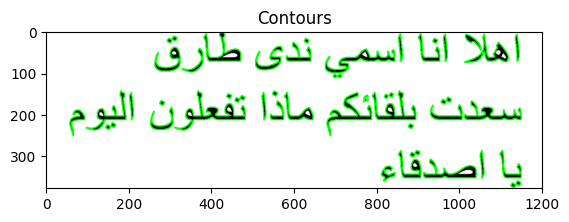

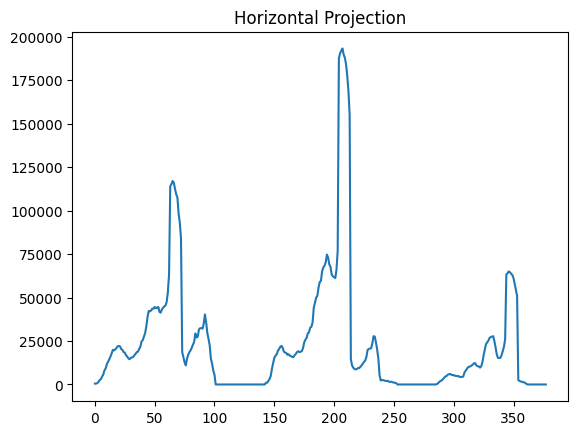

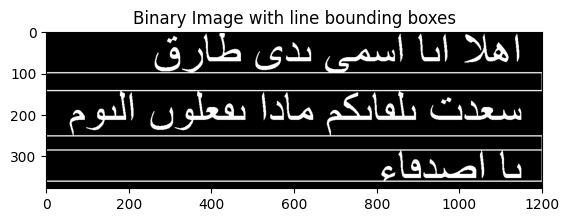

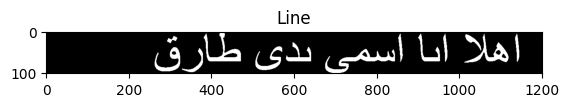

(101, 1201)


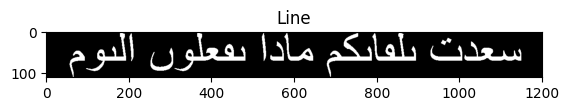

(110, 1201)


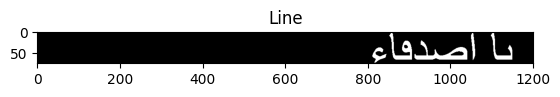

(76, 1201)


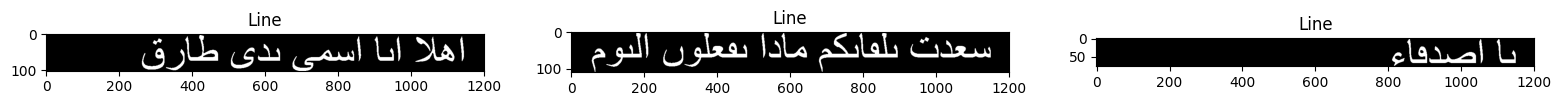

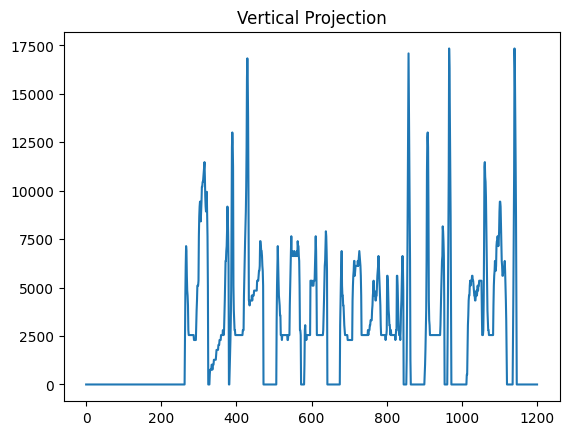

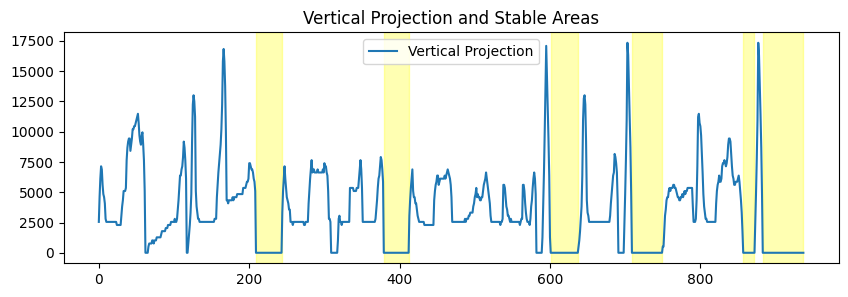

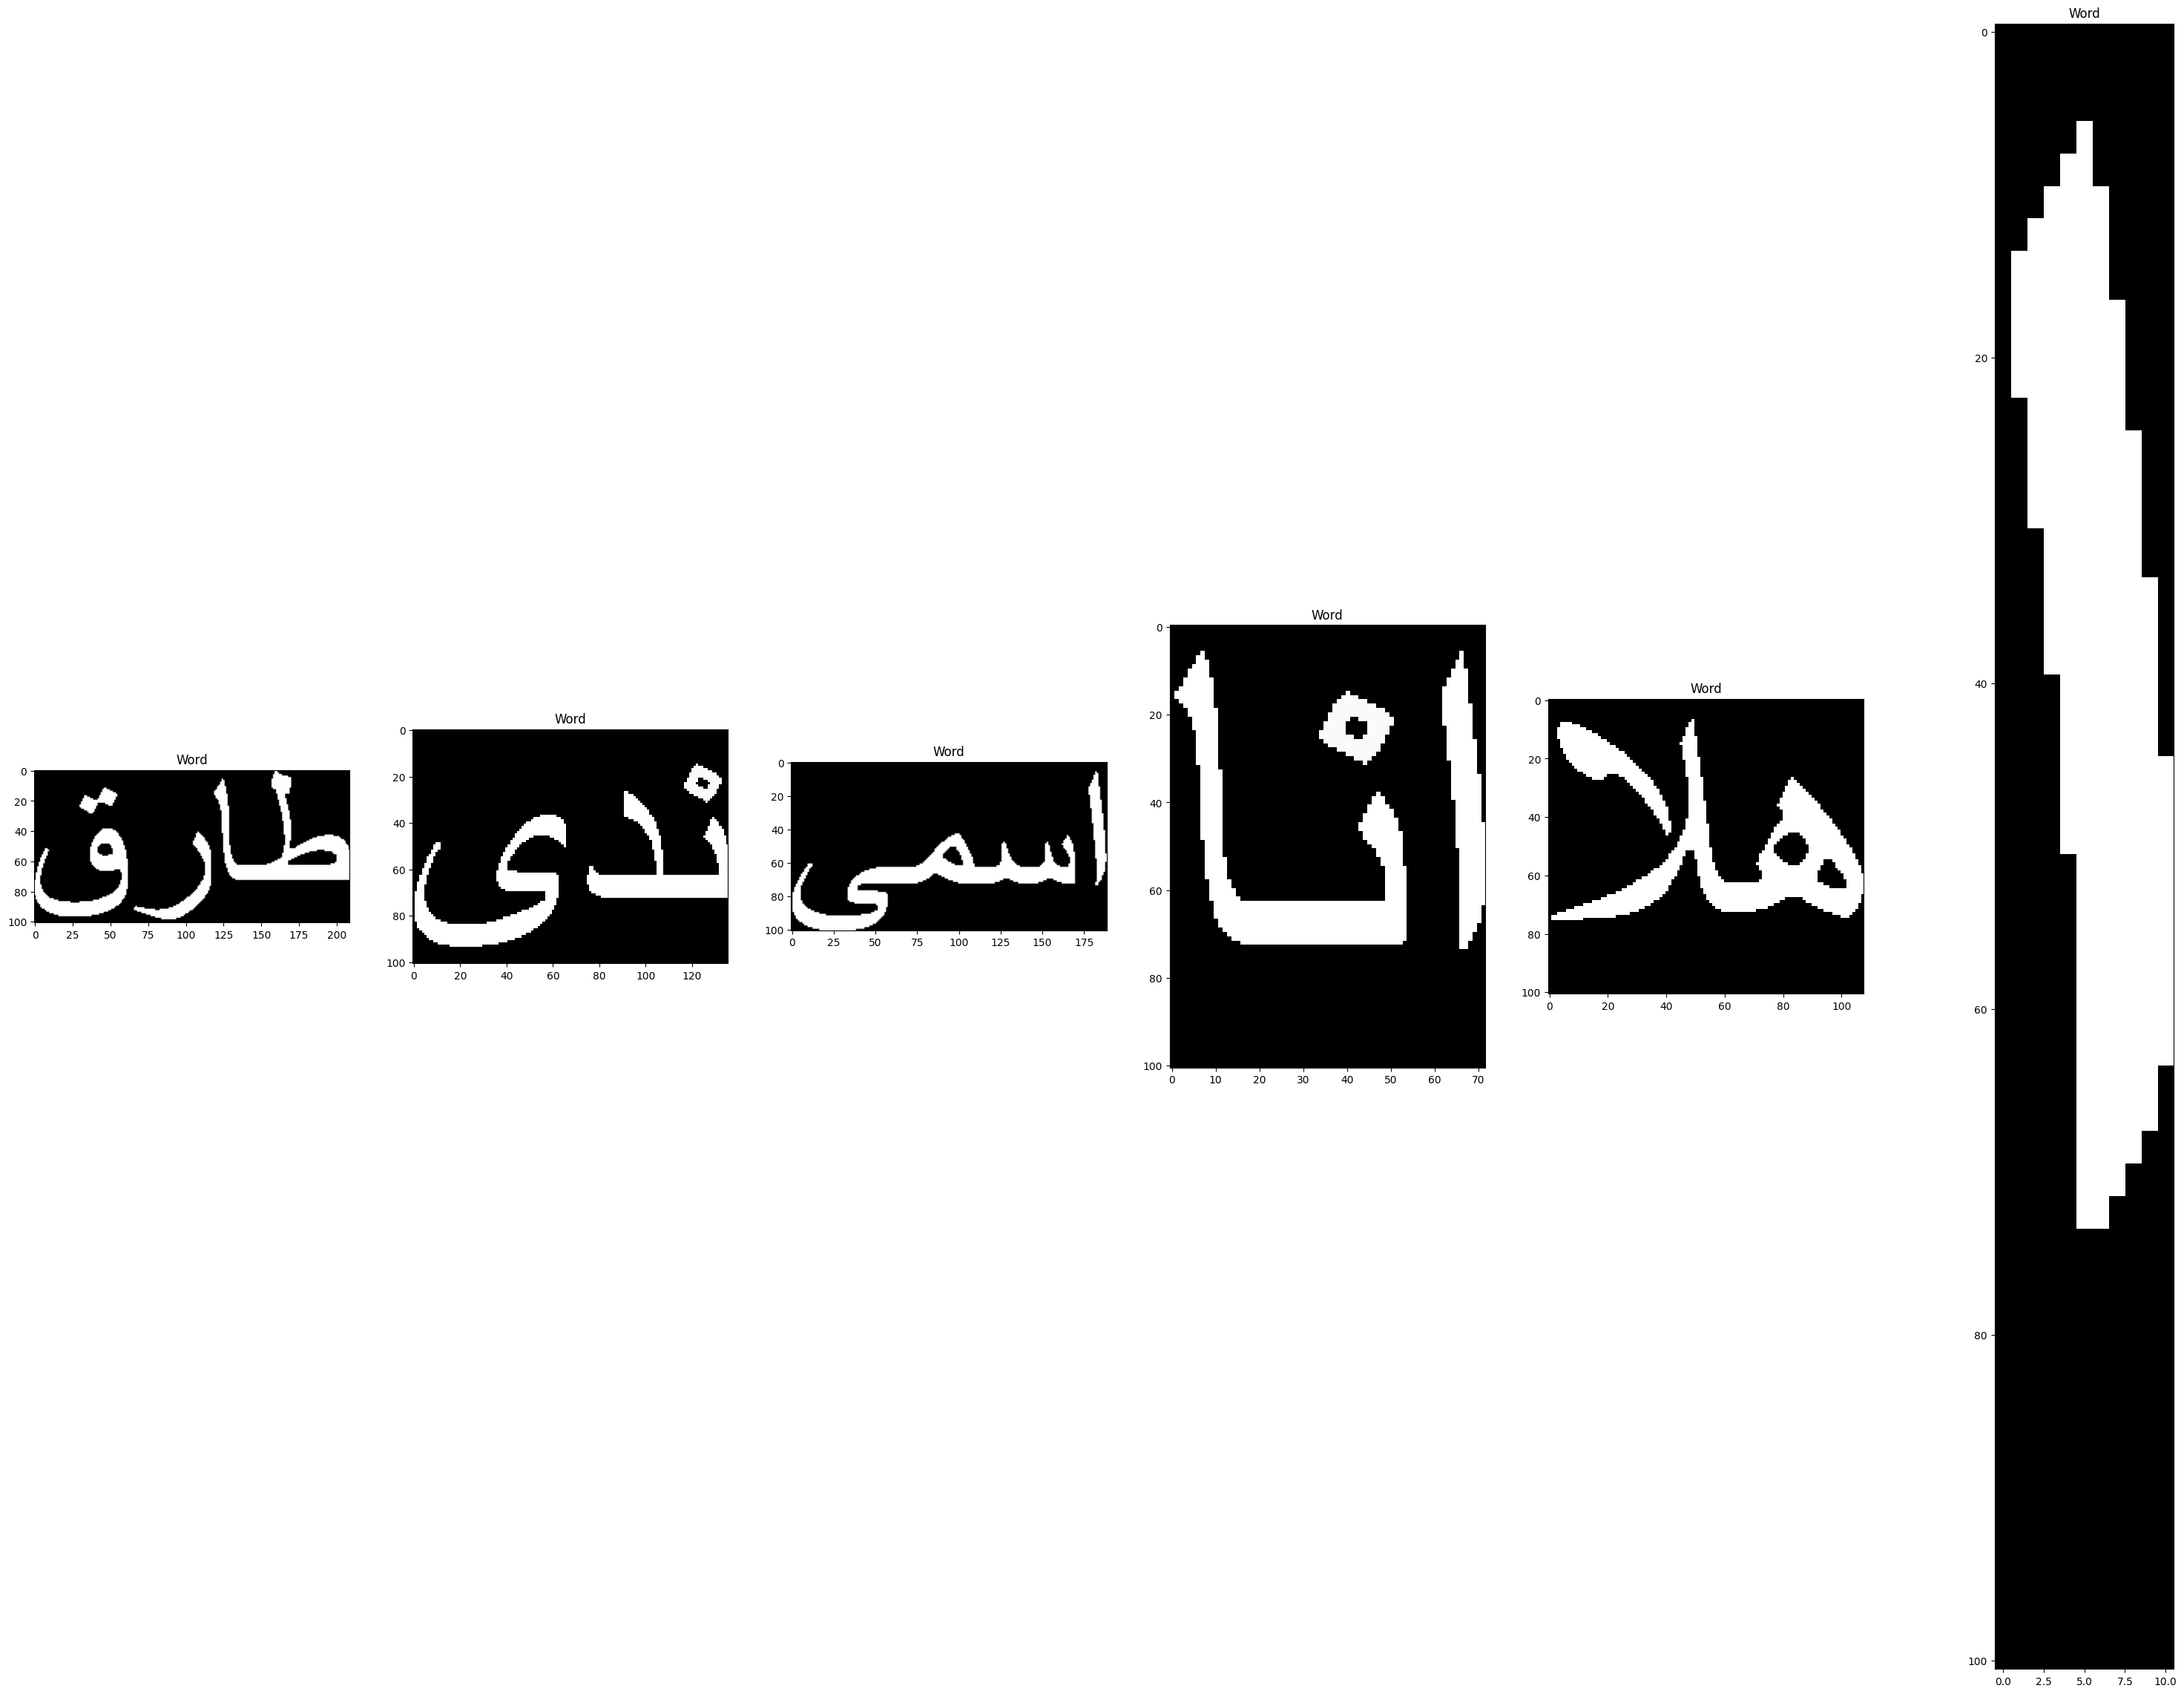

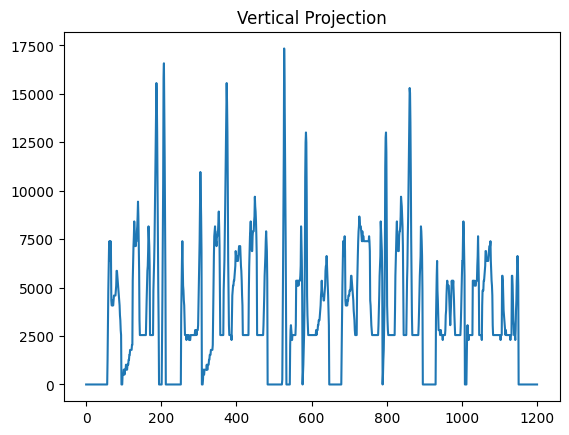

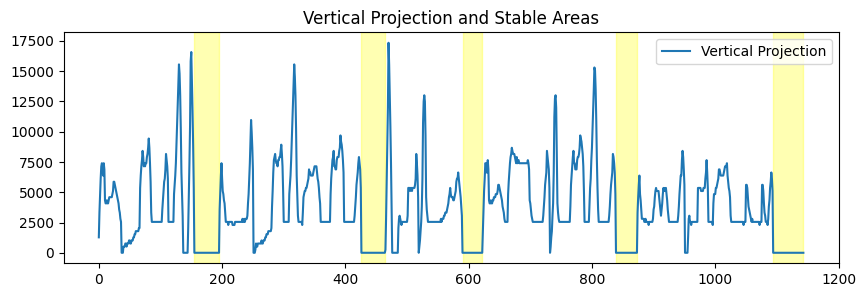

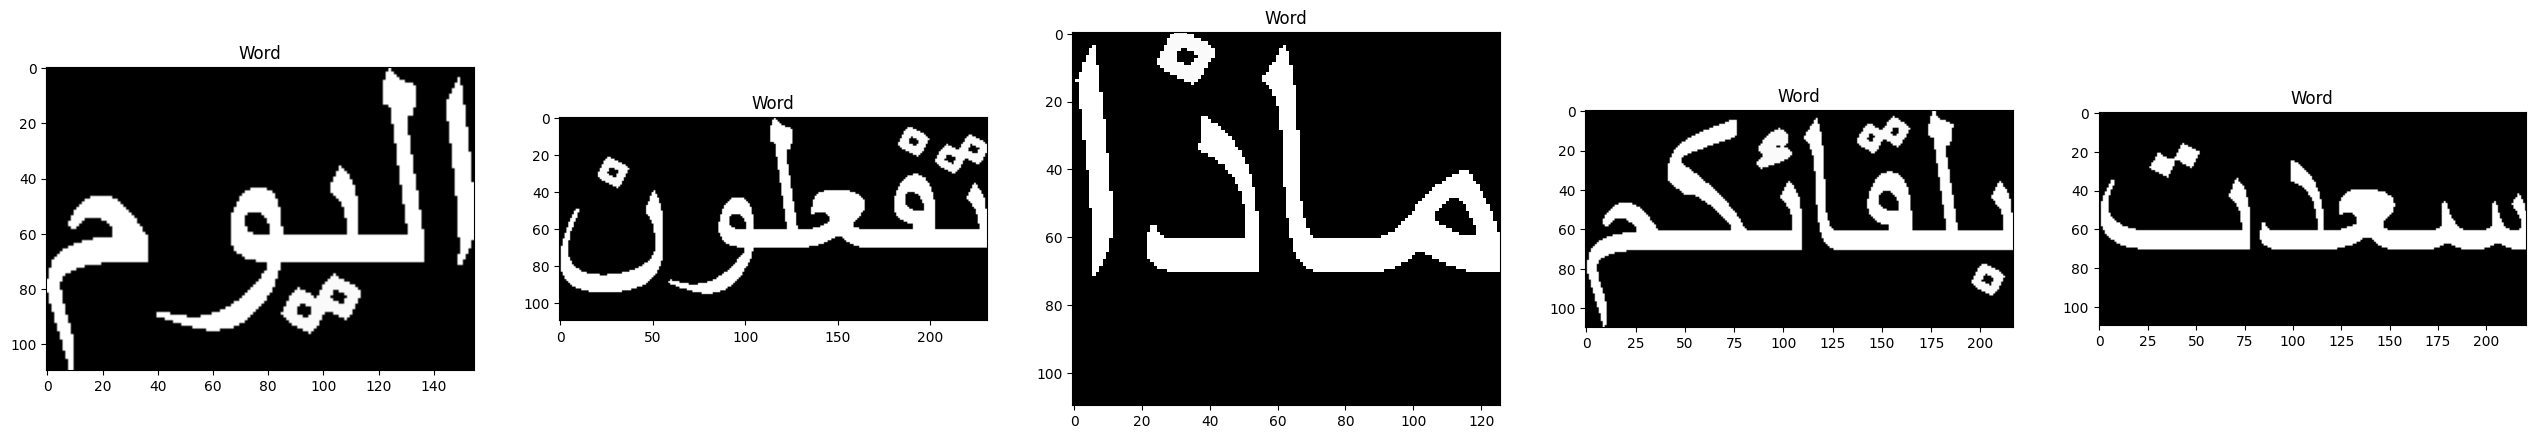

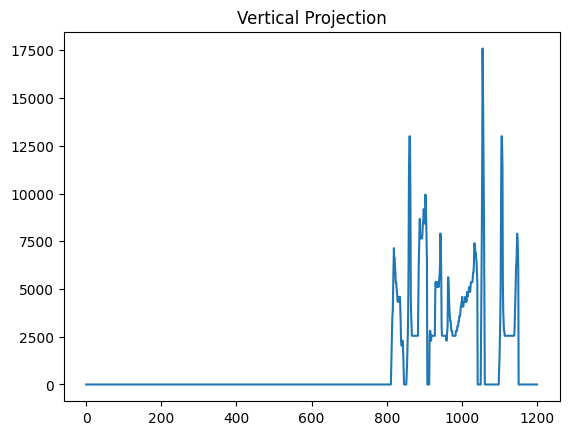

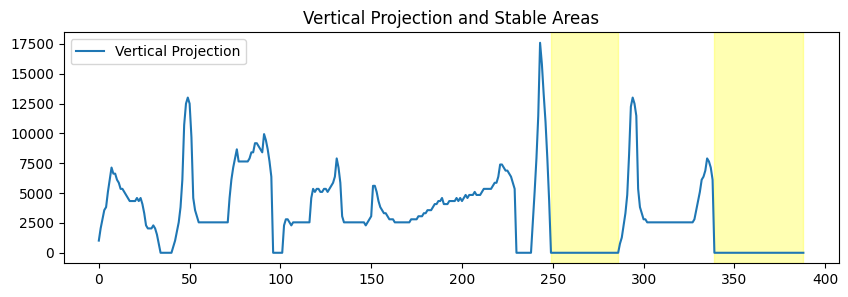

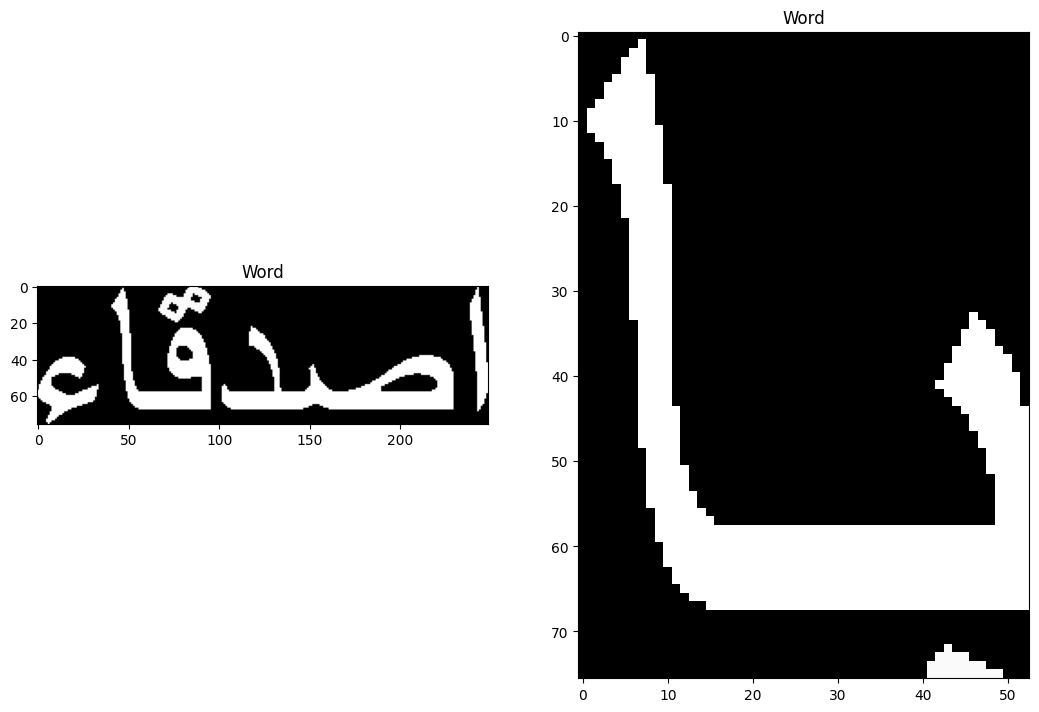

In [5]:
with importnb.Notebook():
    import character_segmentation
    import Segmentation

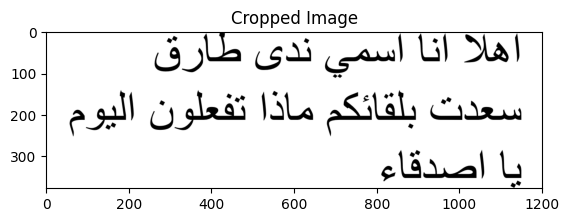

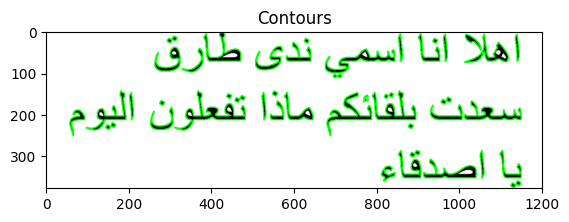

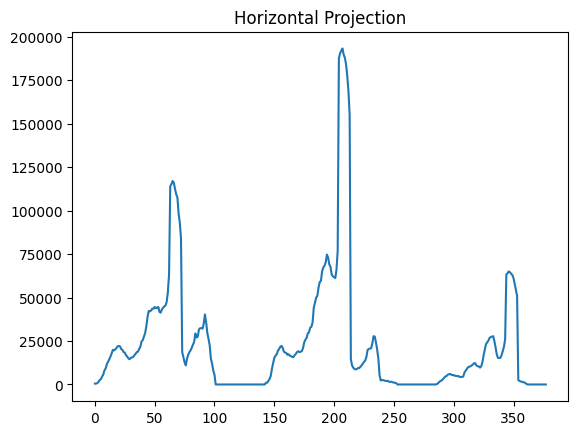

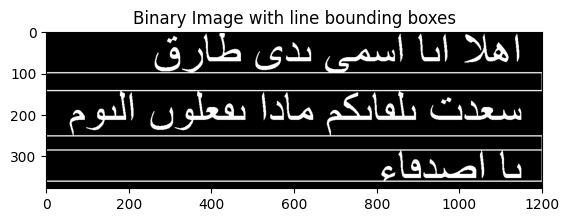

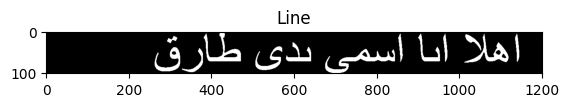

(101, 1201)


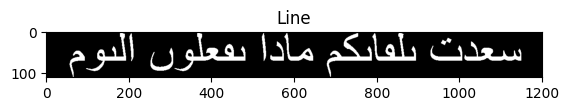

(110, 1201)


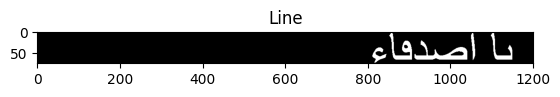

(76, 1201)


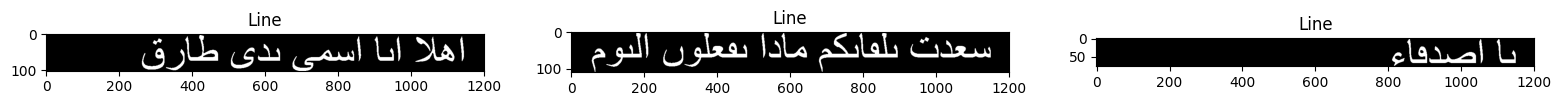

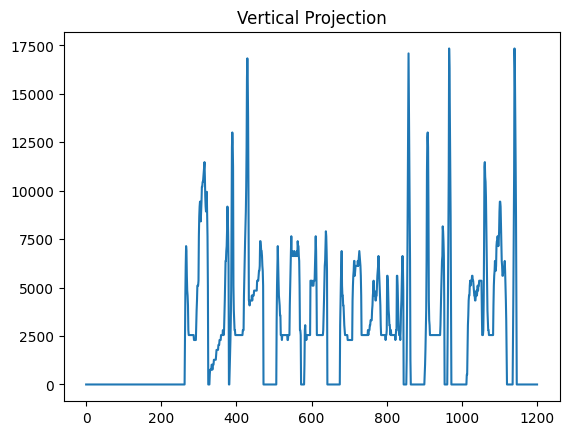

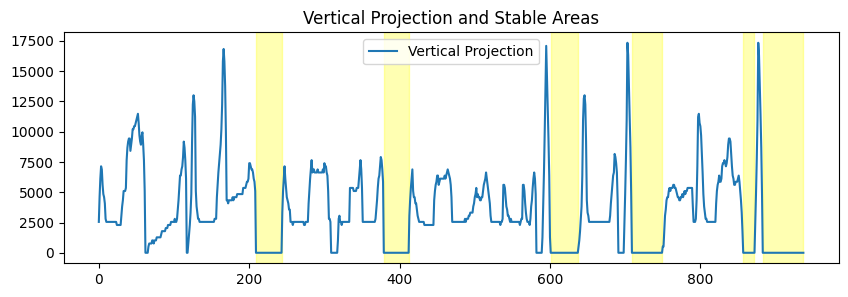

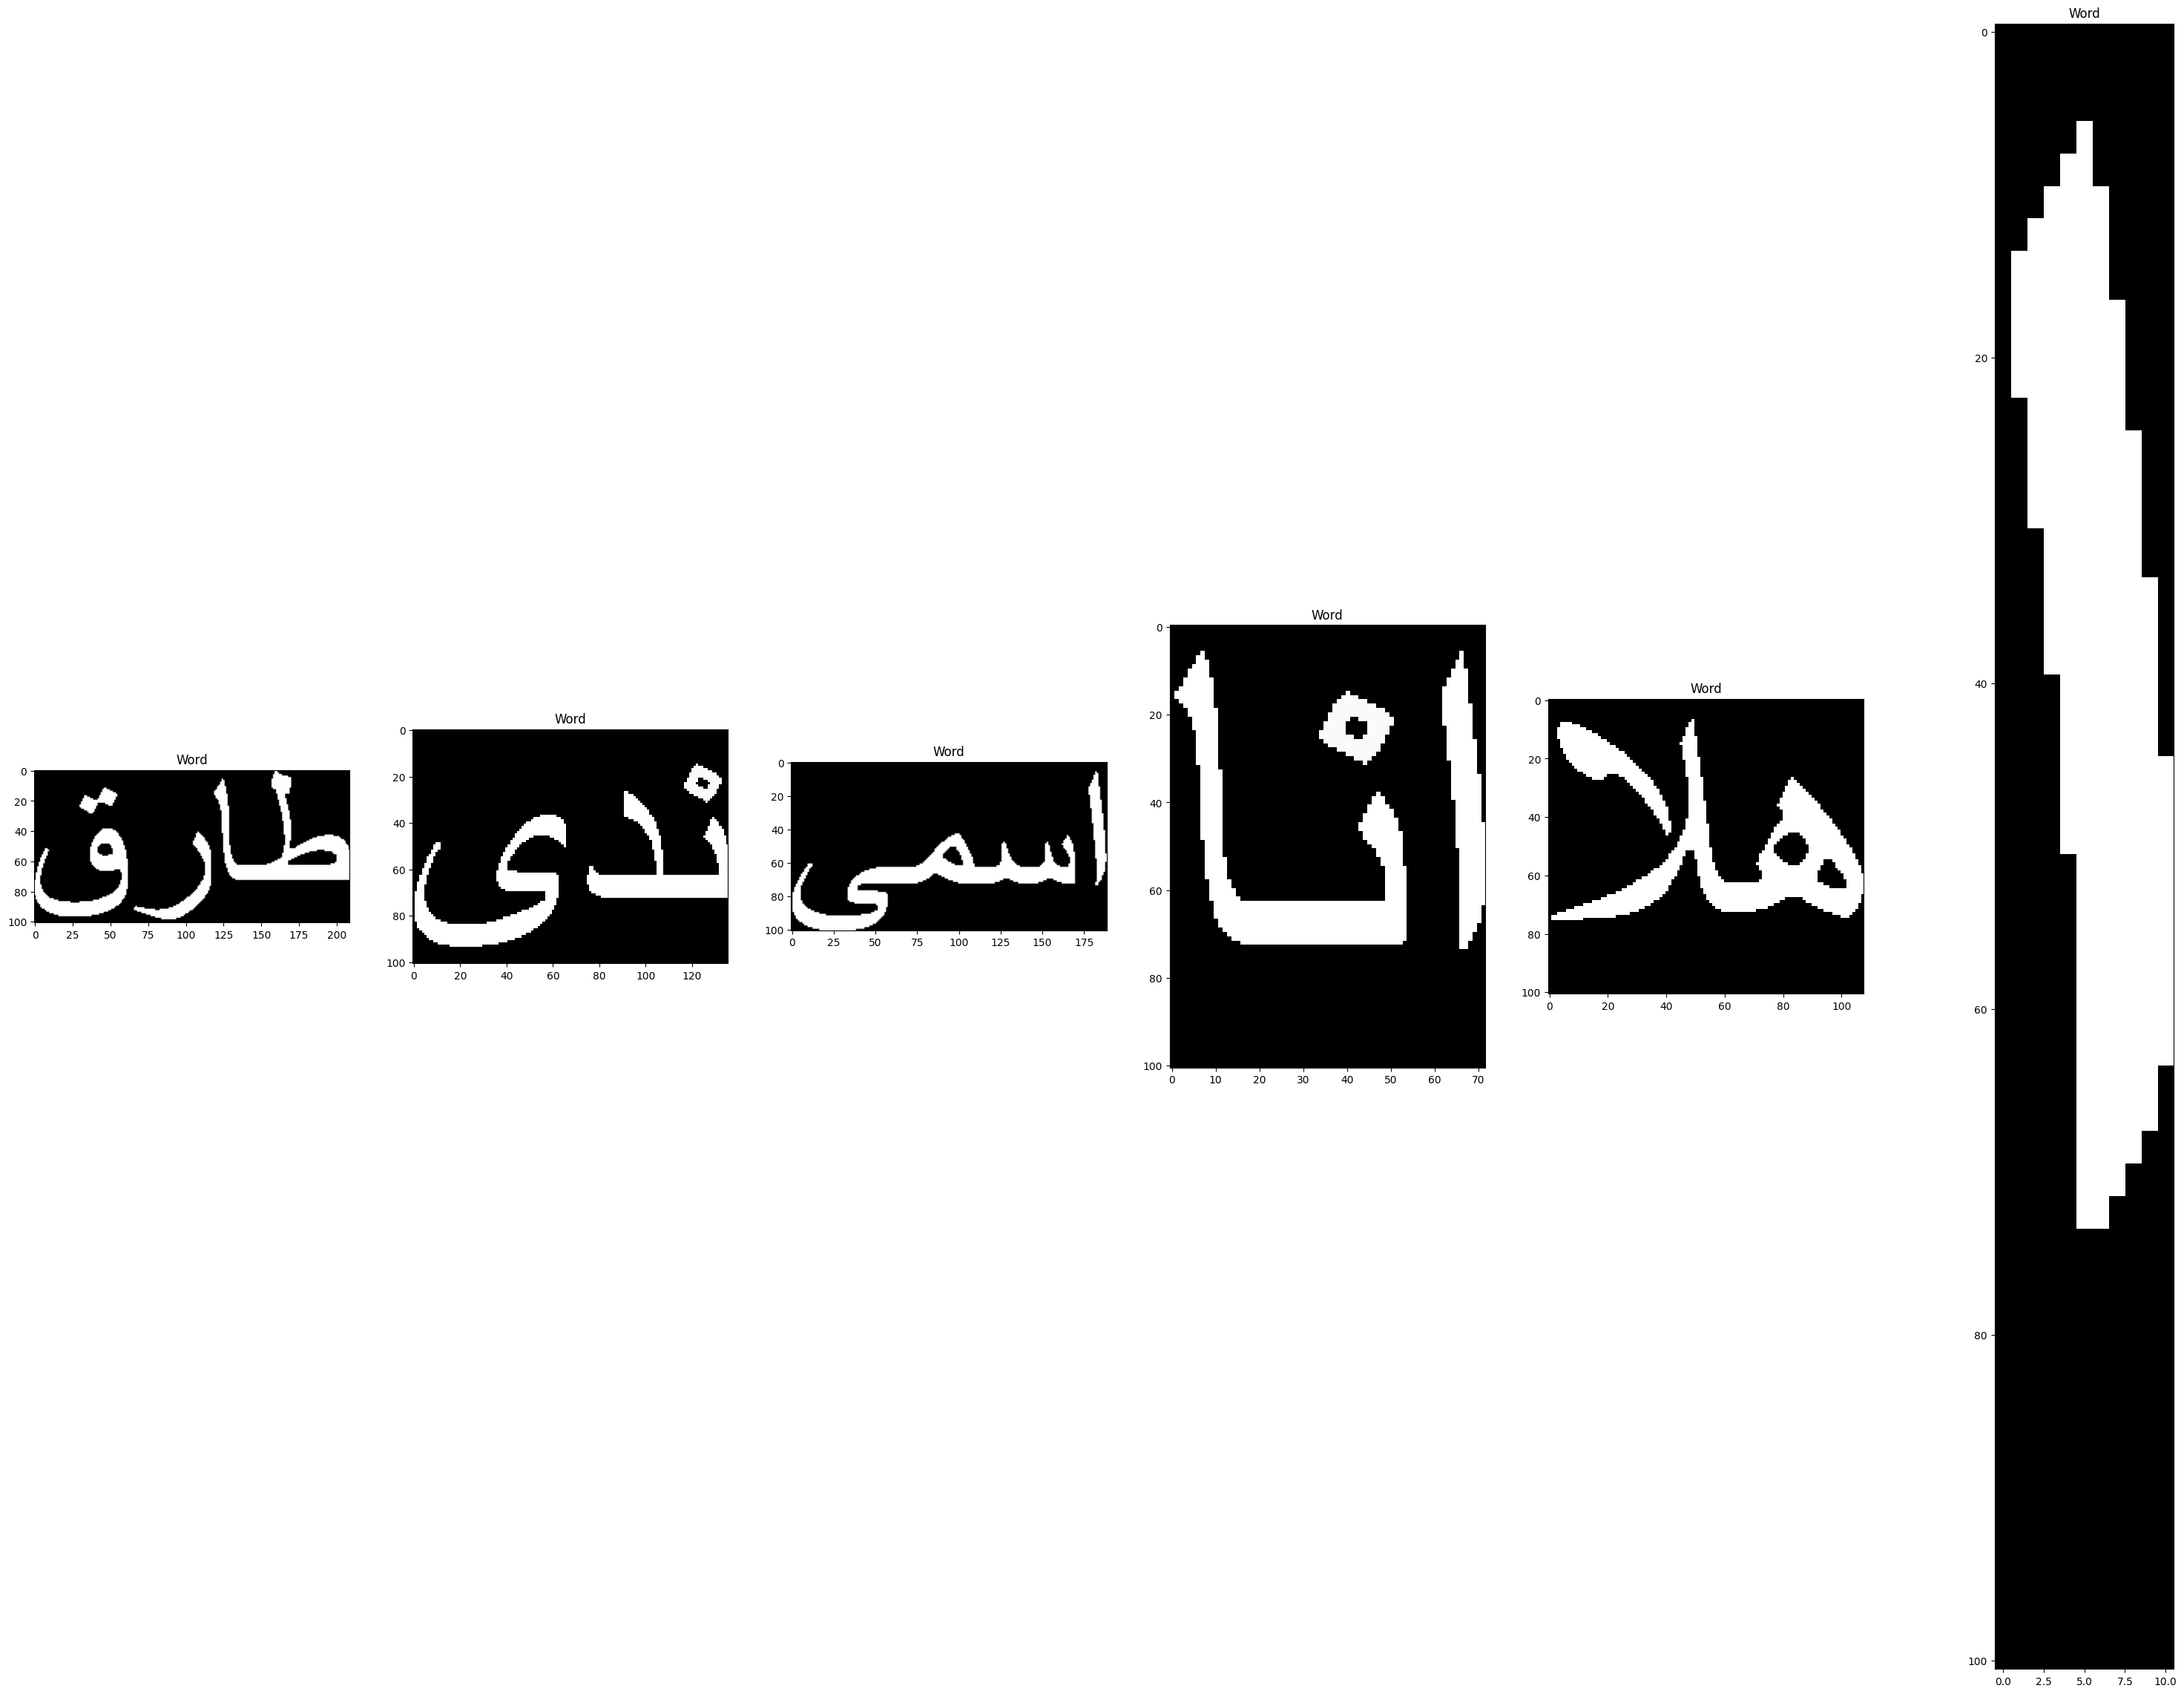

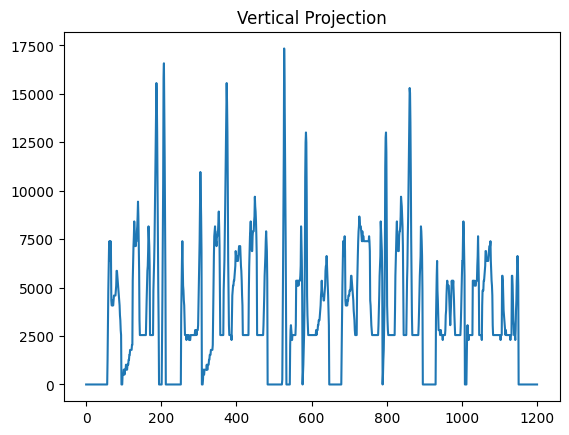

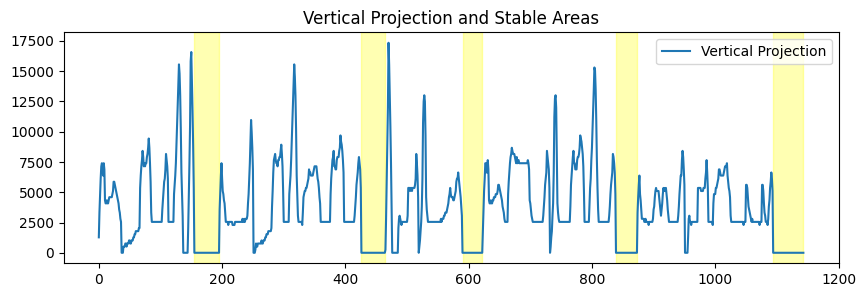

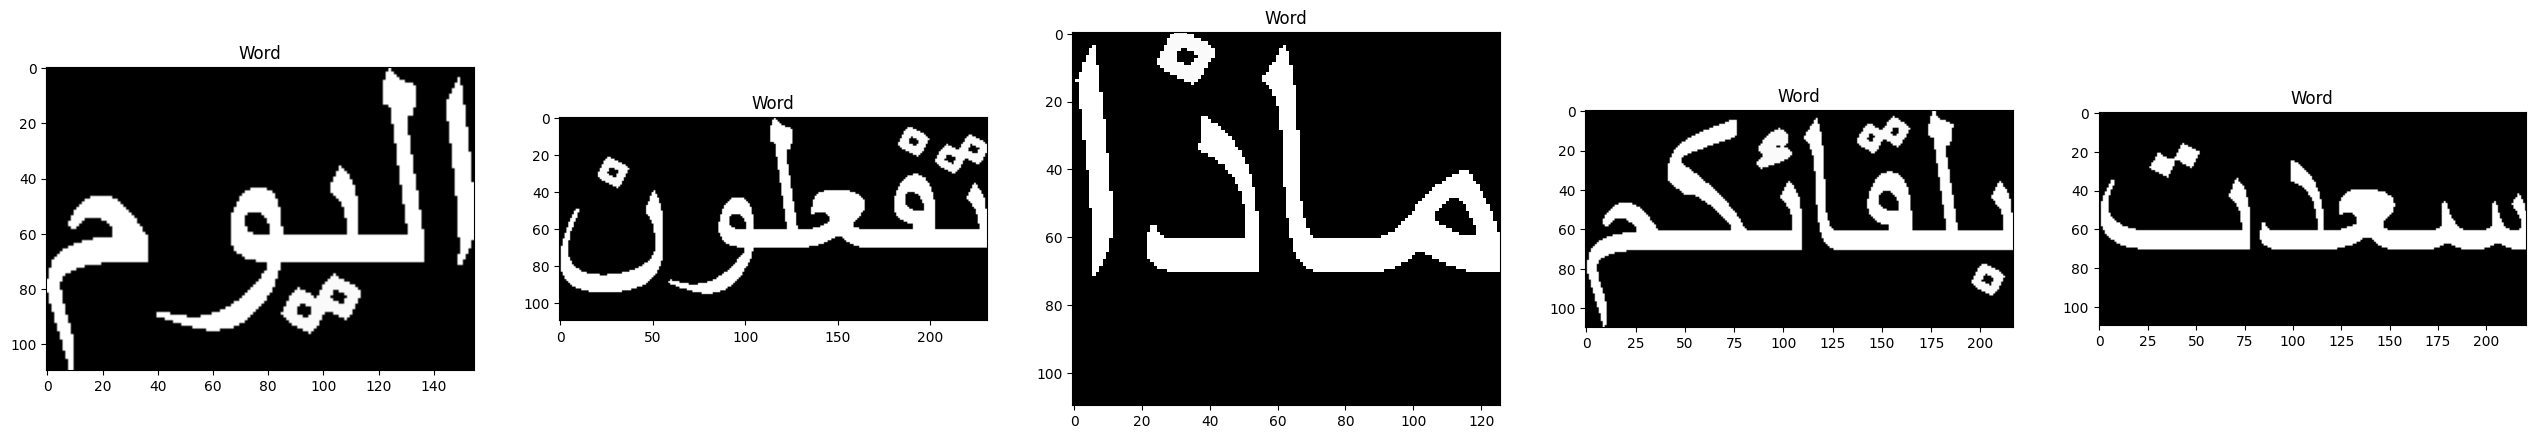

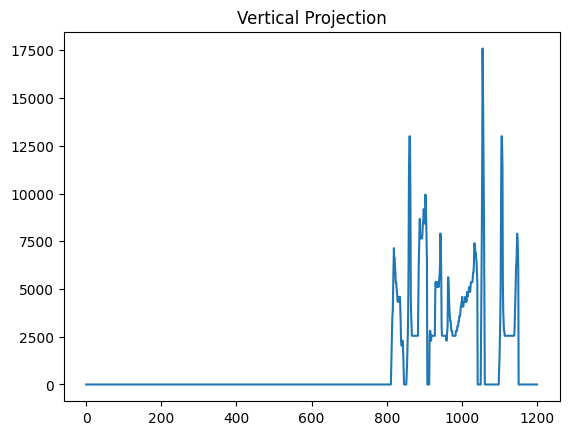

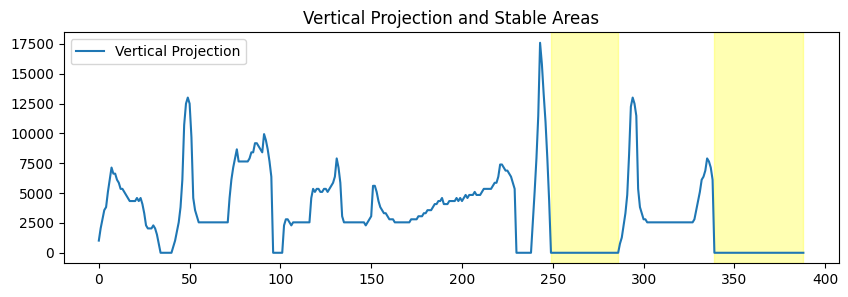

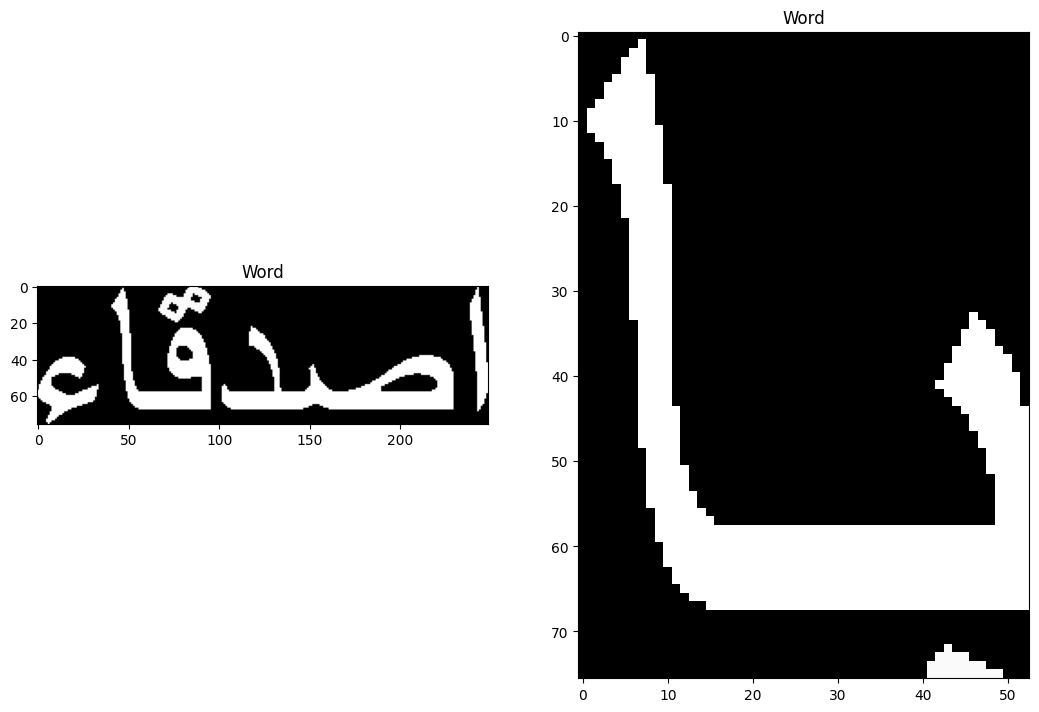

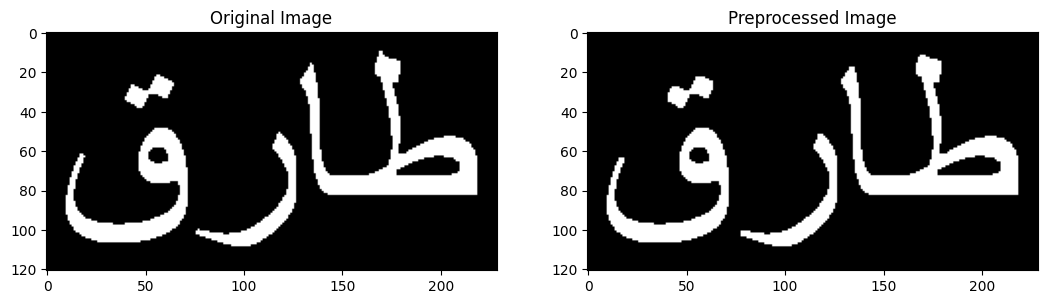

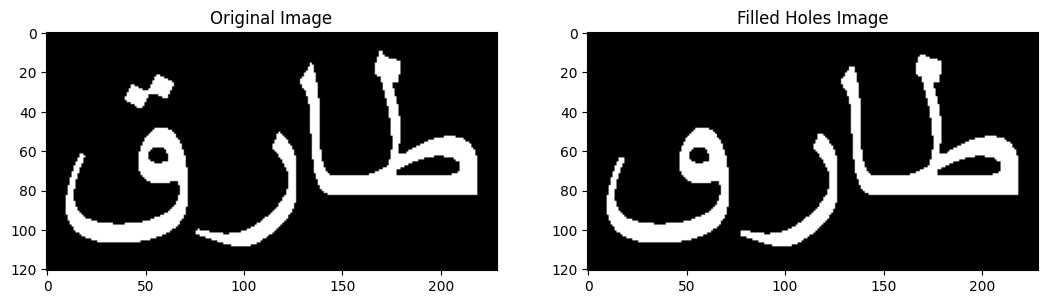

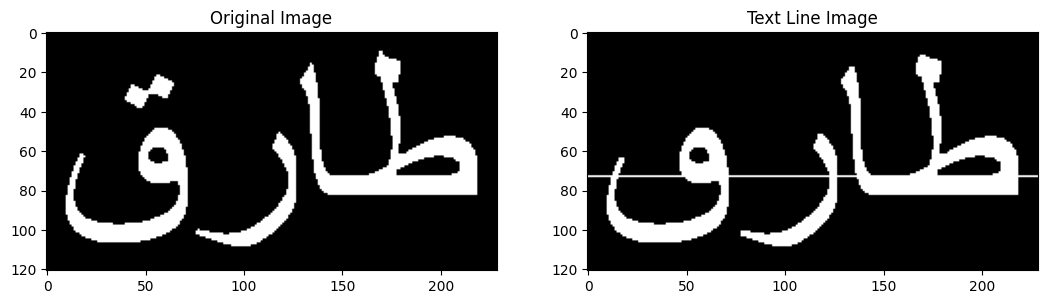

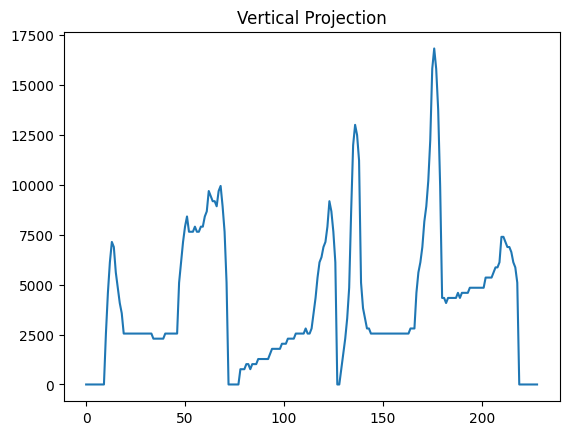

C:\Users\NADA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\NADA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


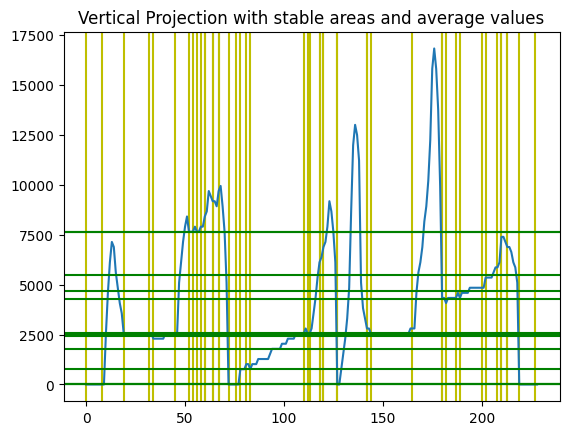

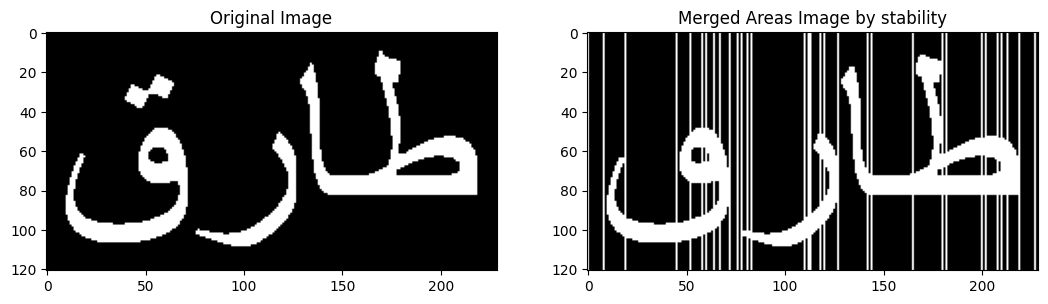

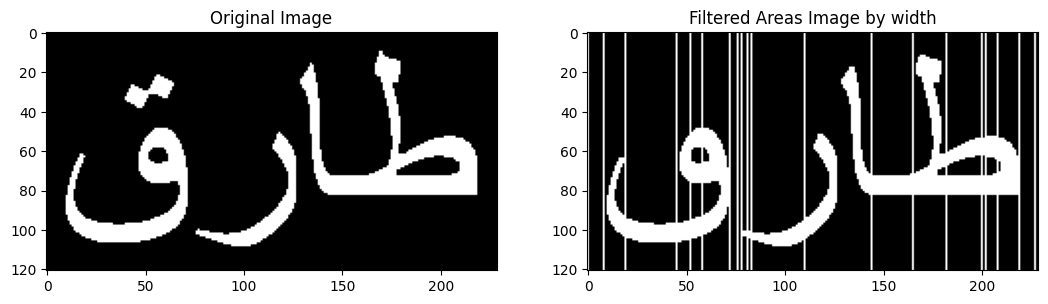

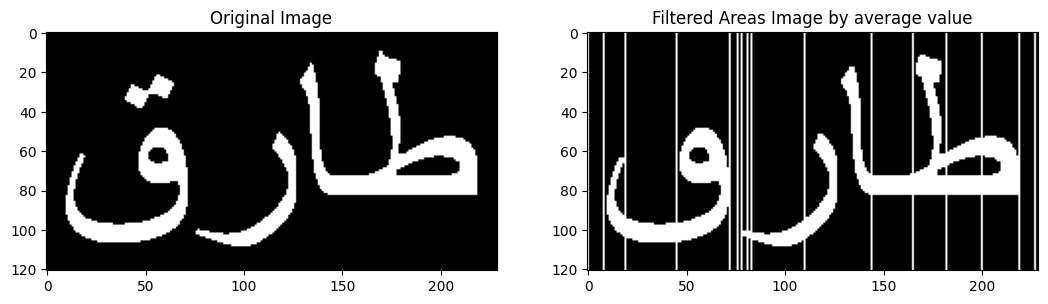

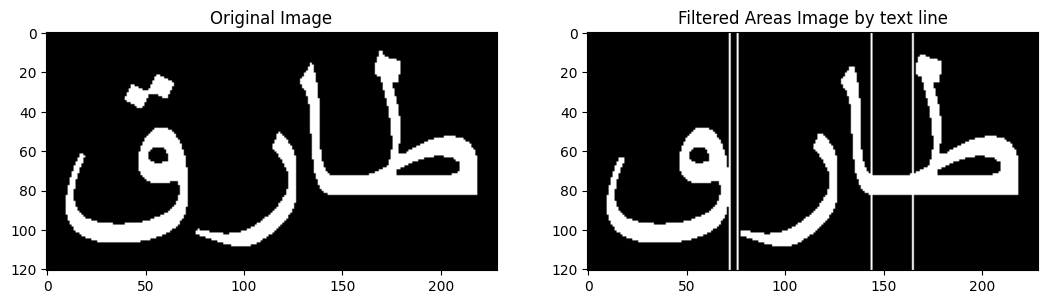

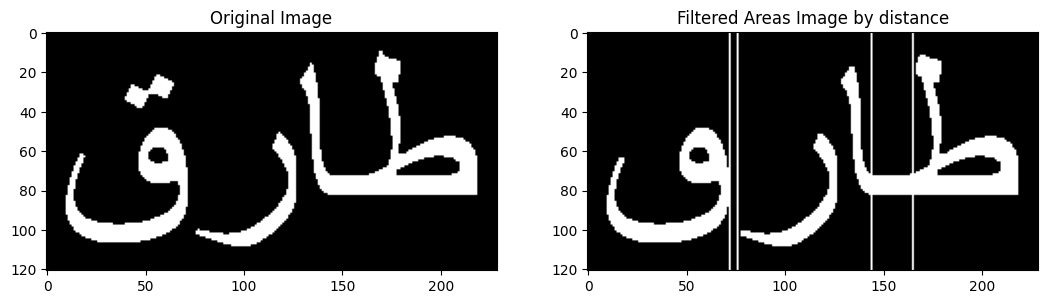

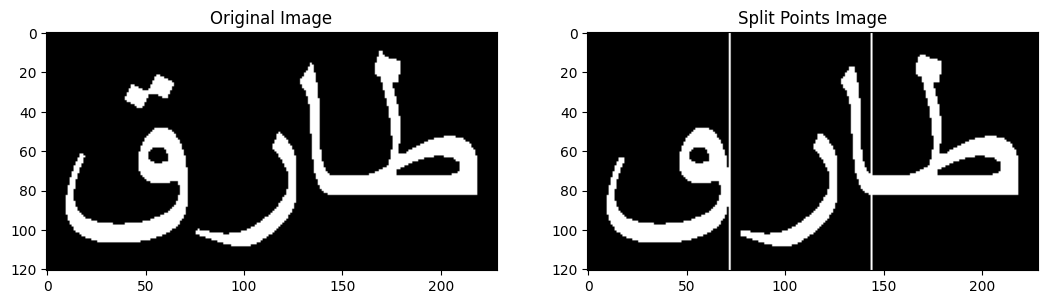

words: 3


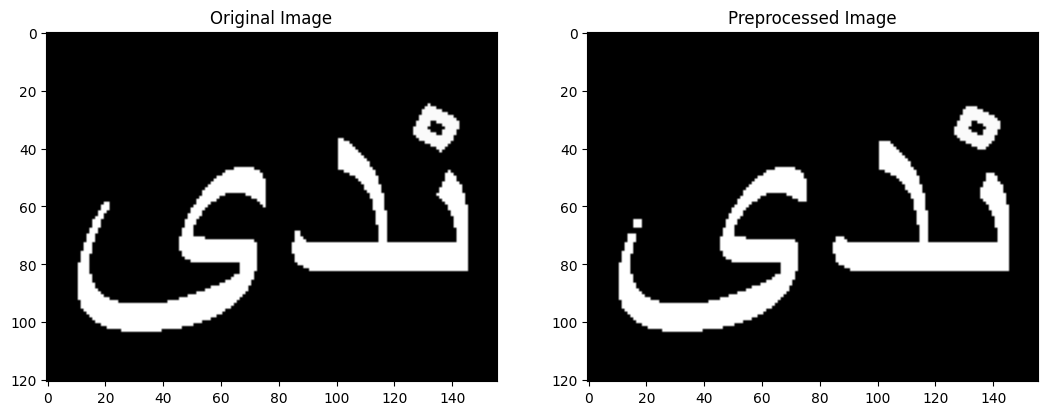

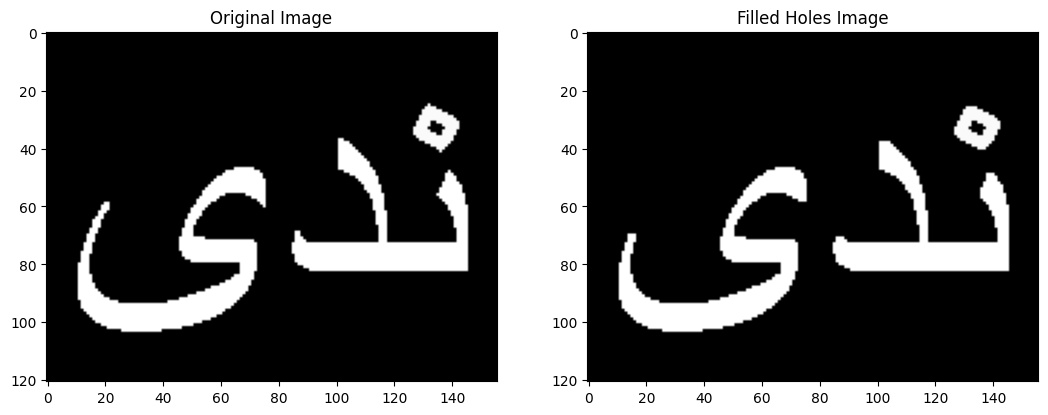

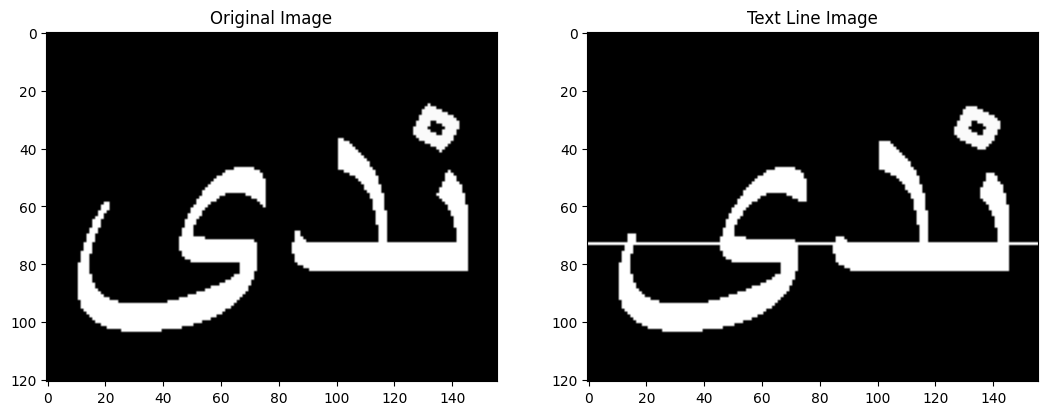

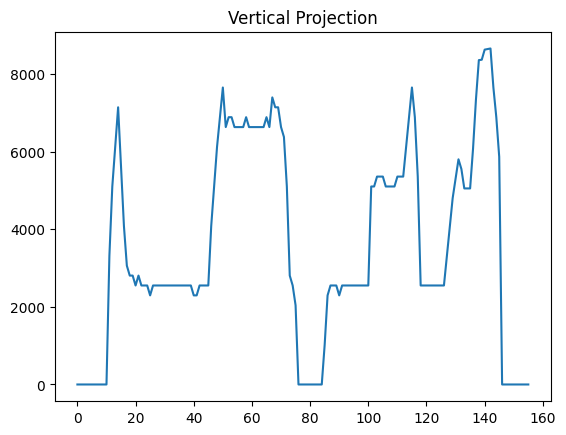

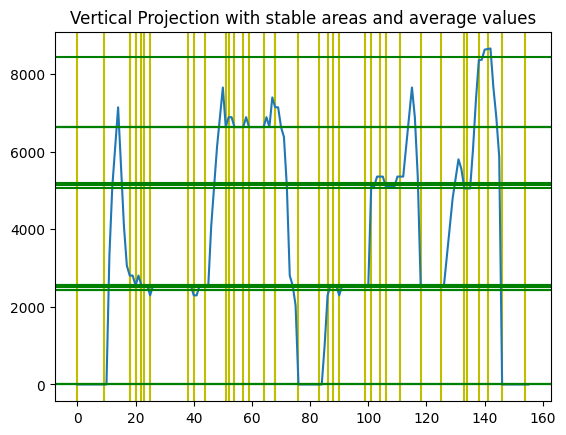

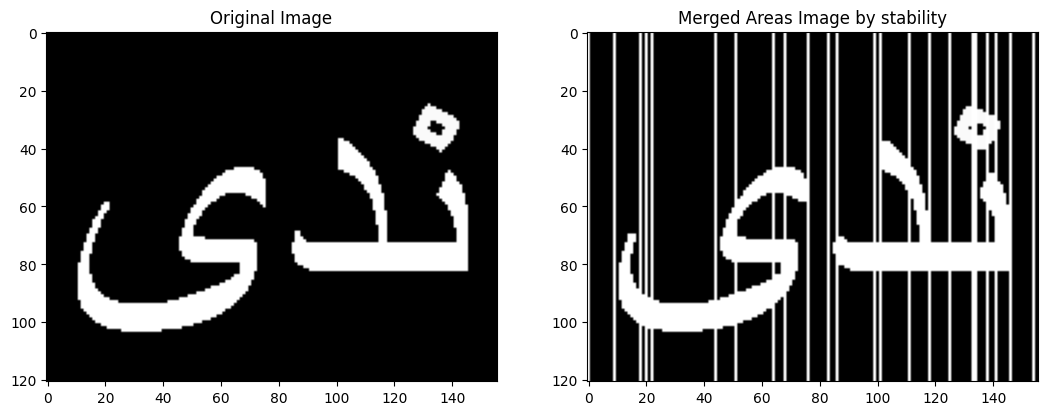

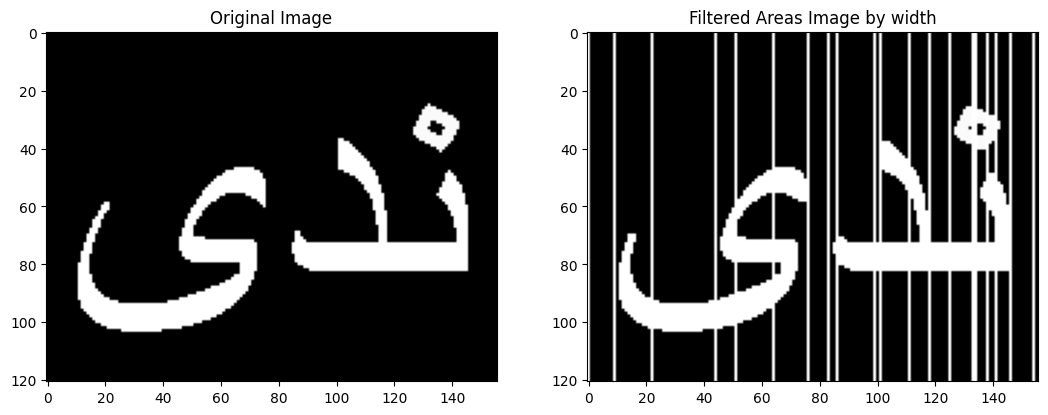

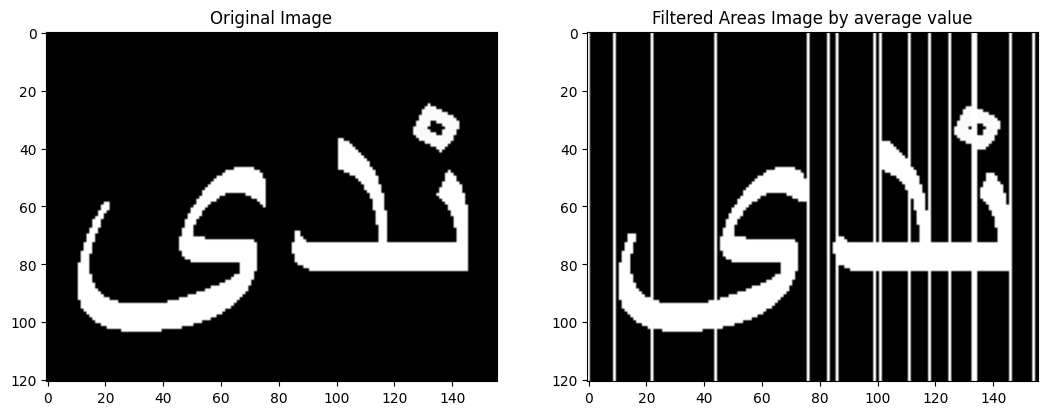

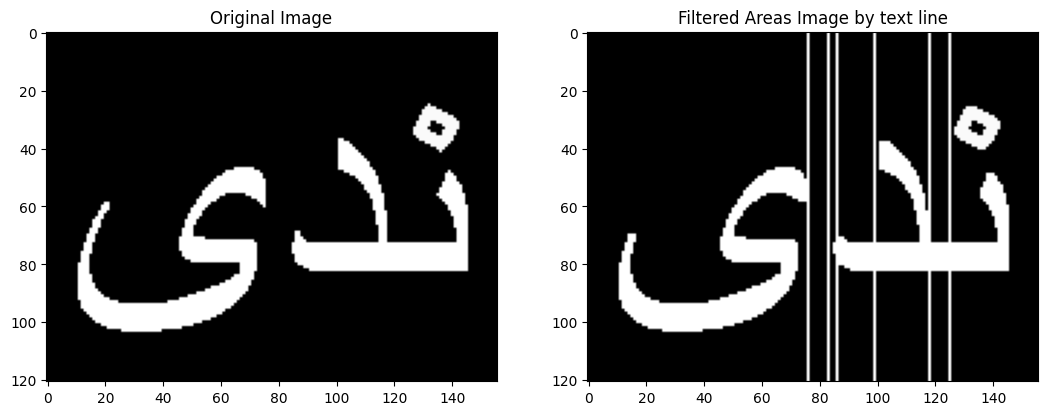

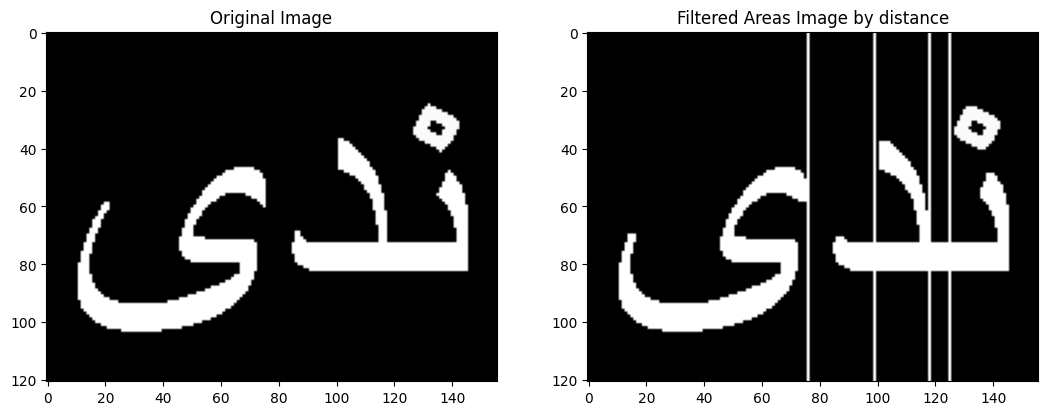

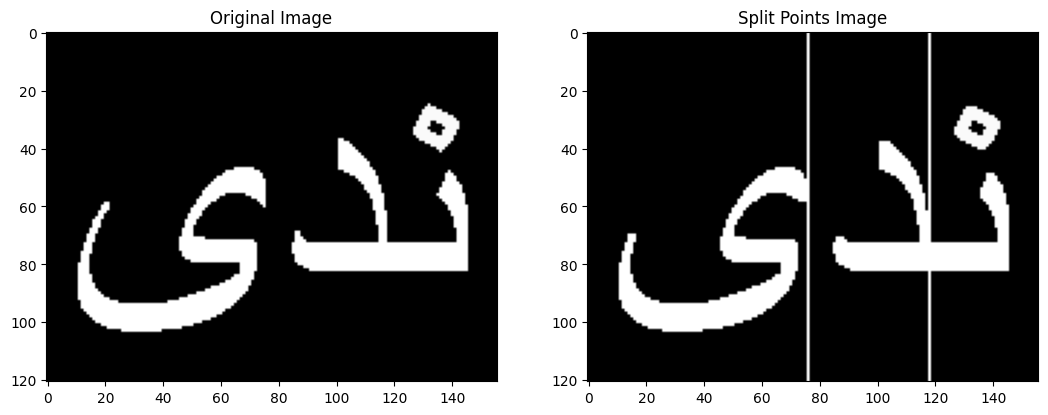

words: 3


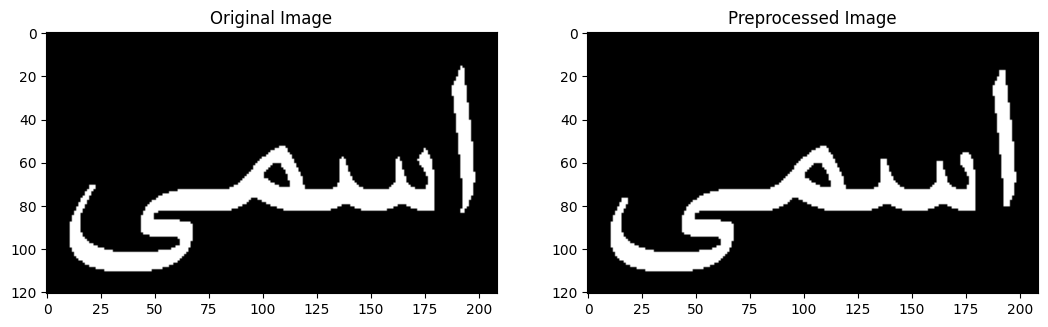

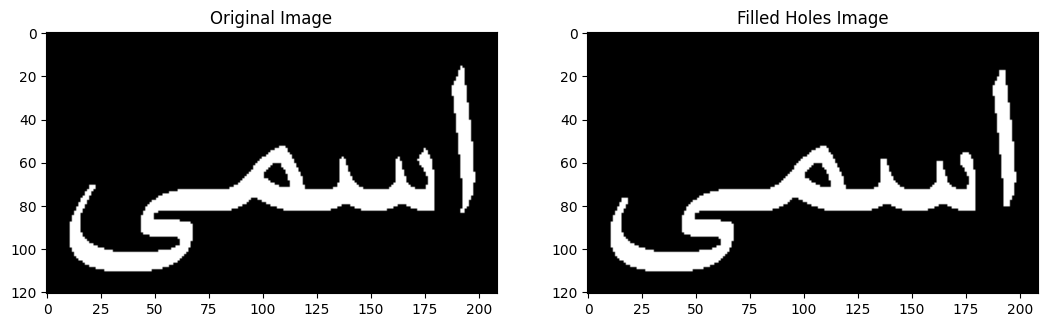

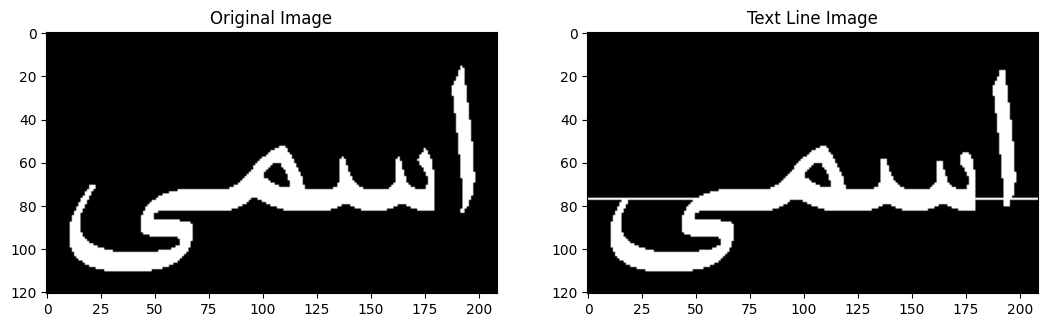

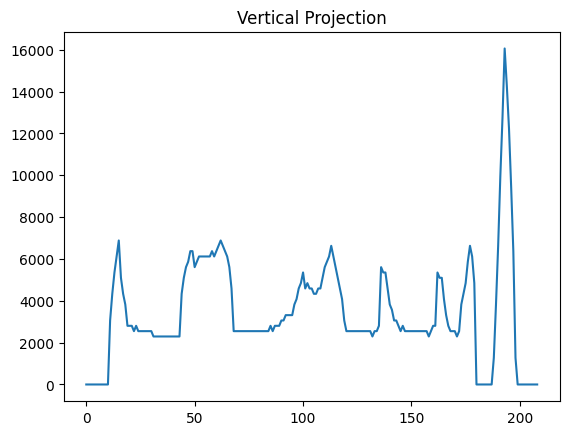

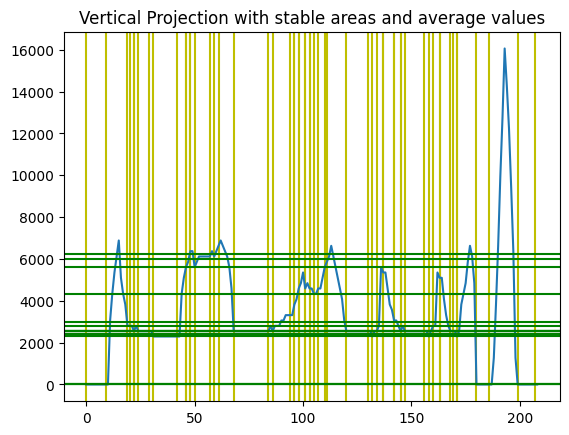

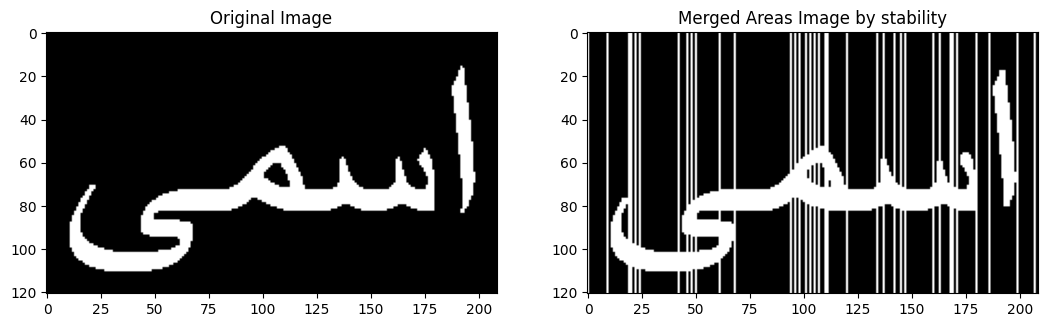

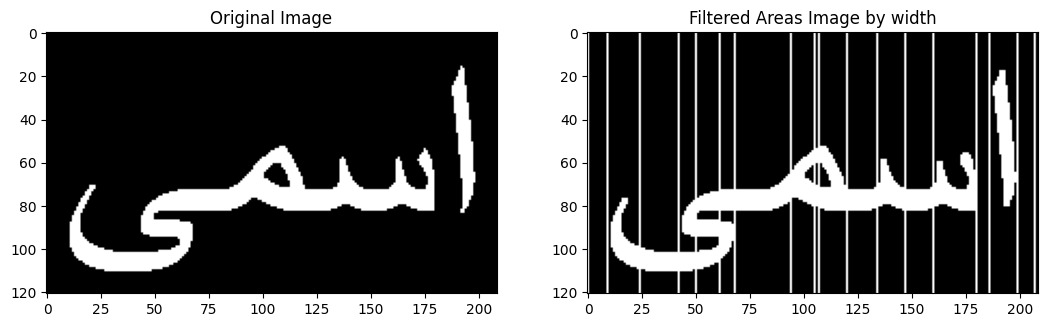

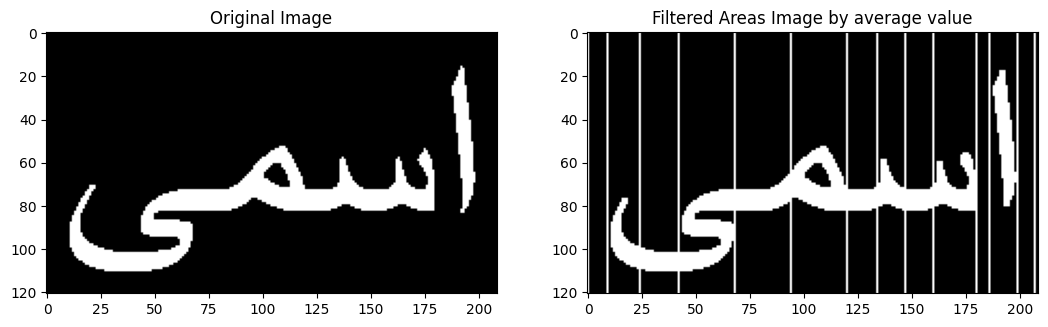

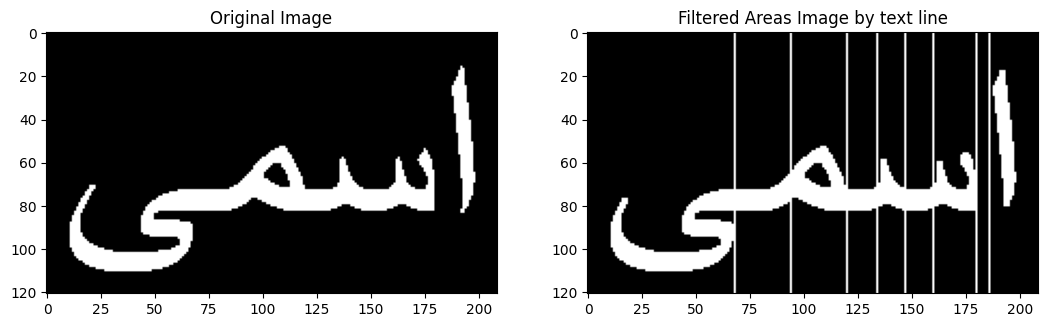

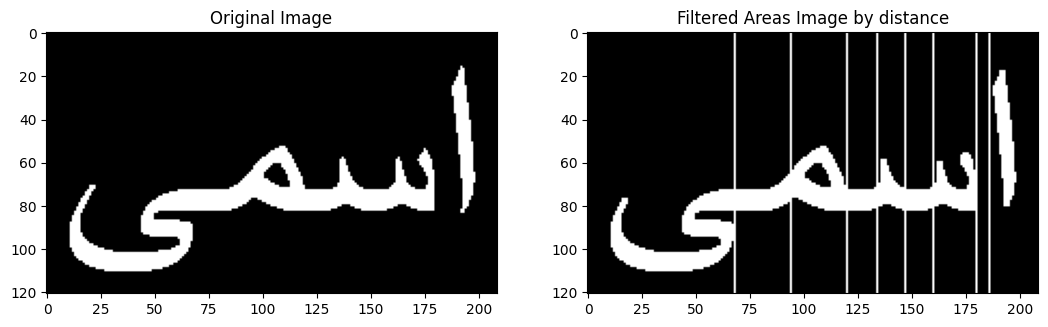

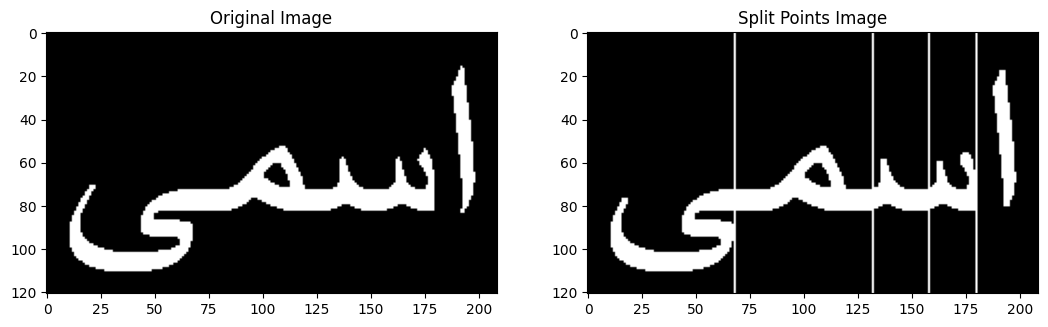

words: 5


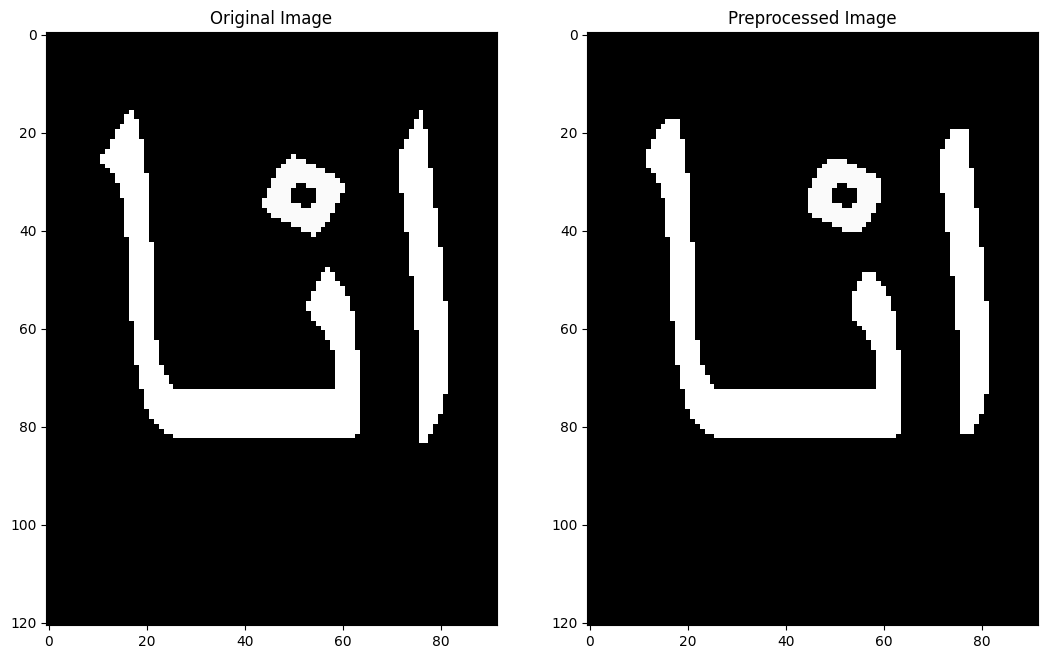

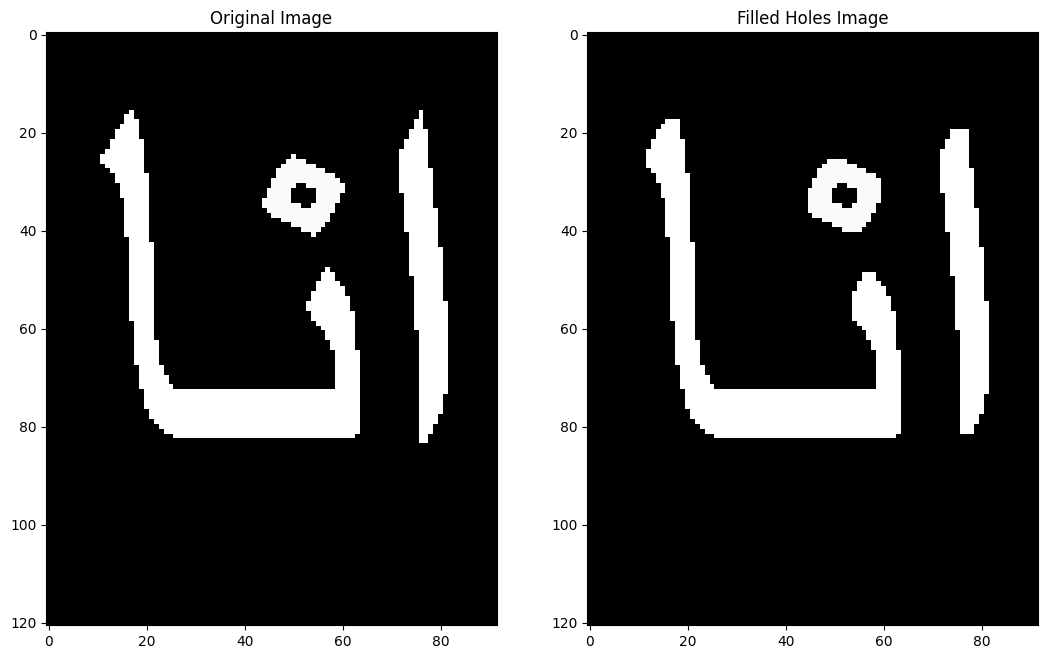

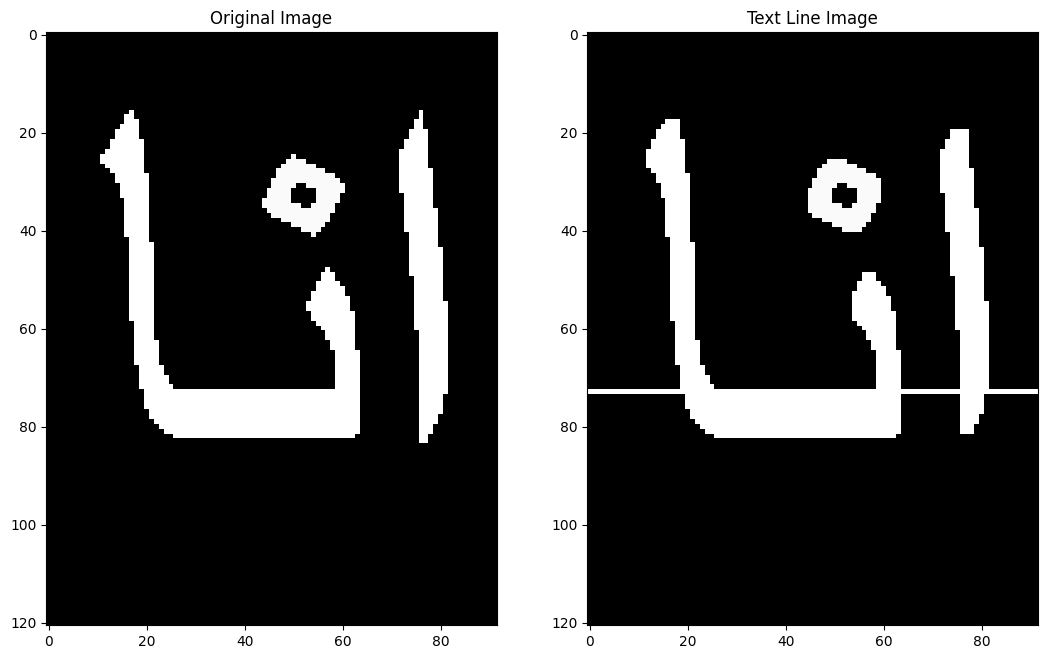

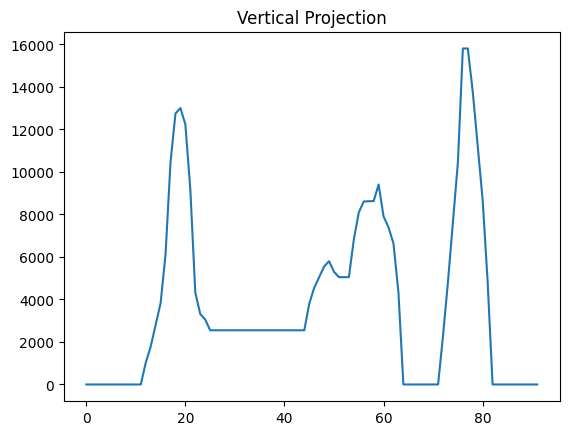

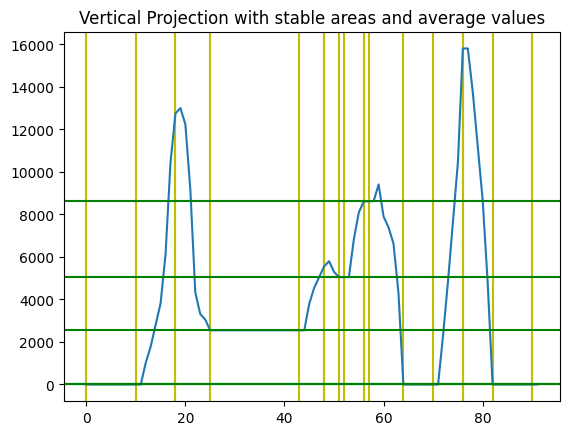

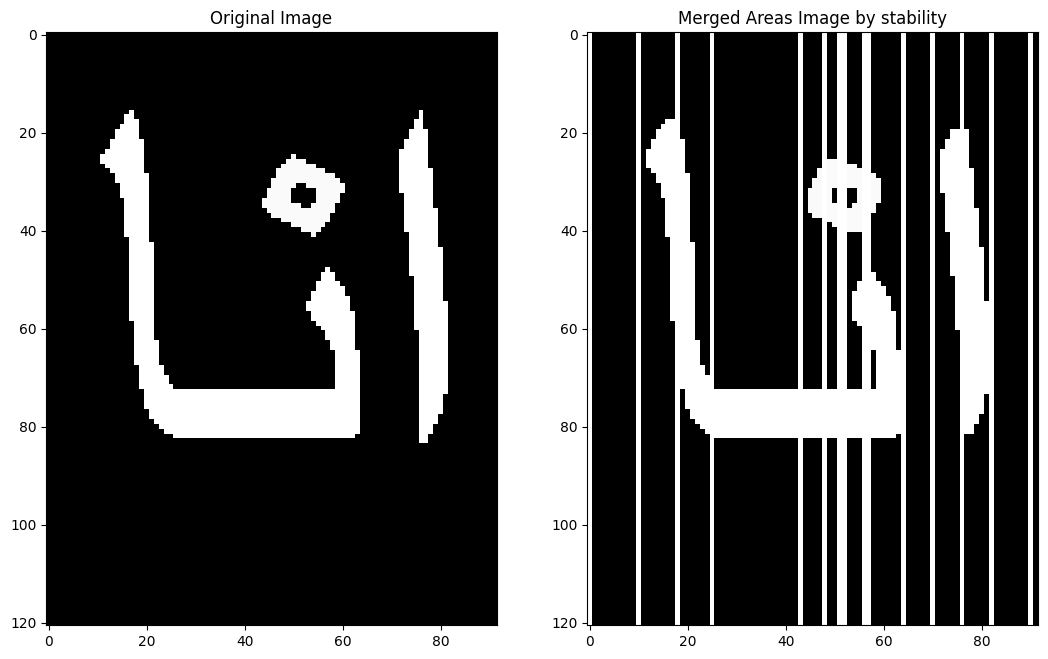

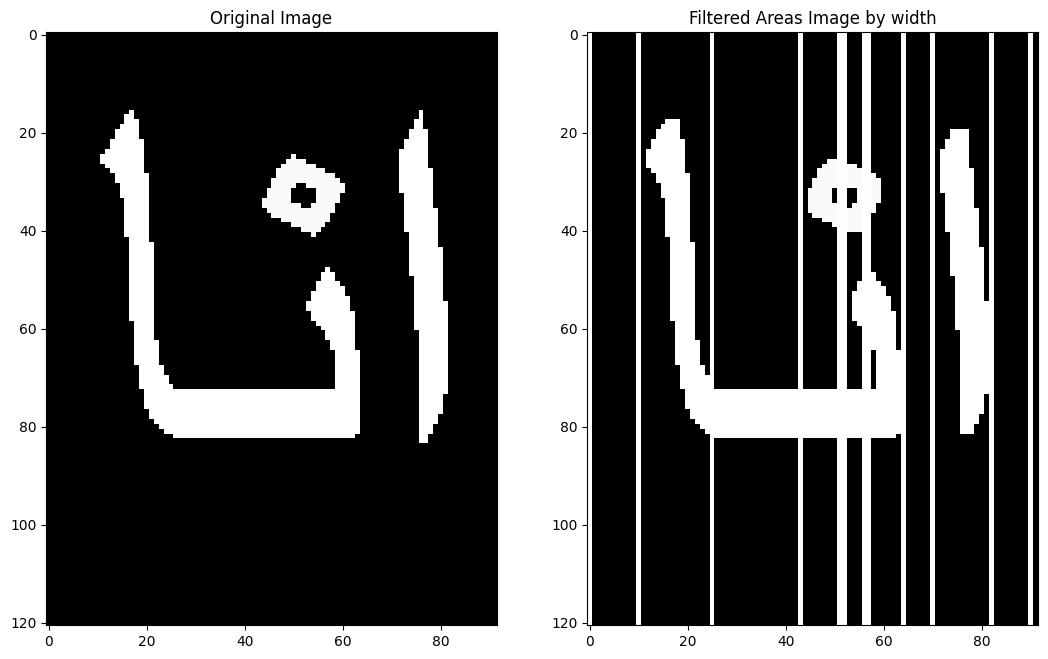

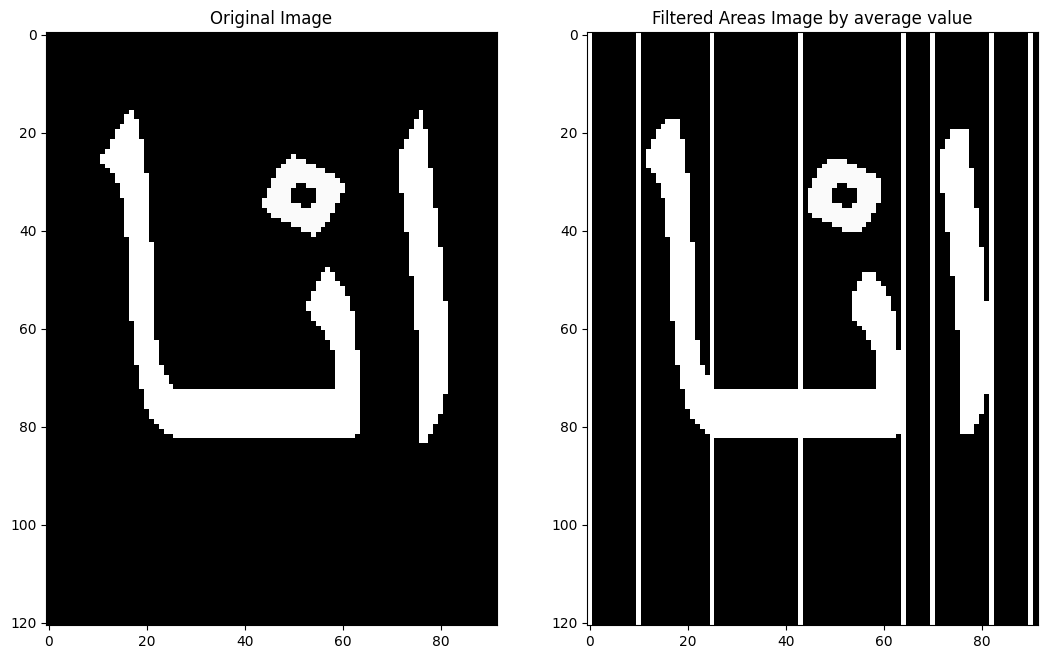

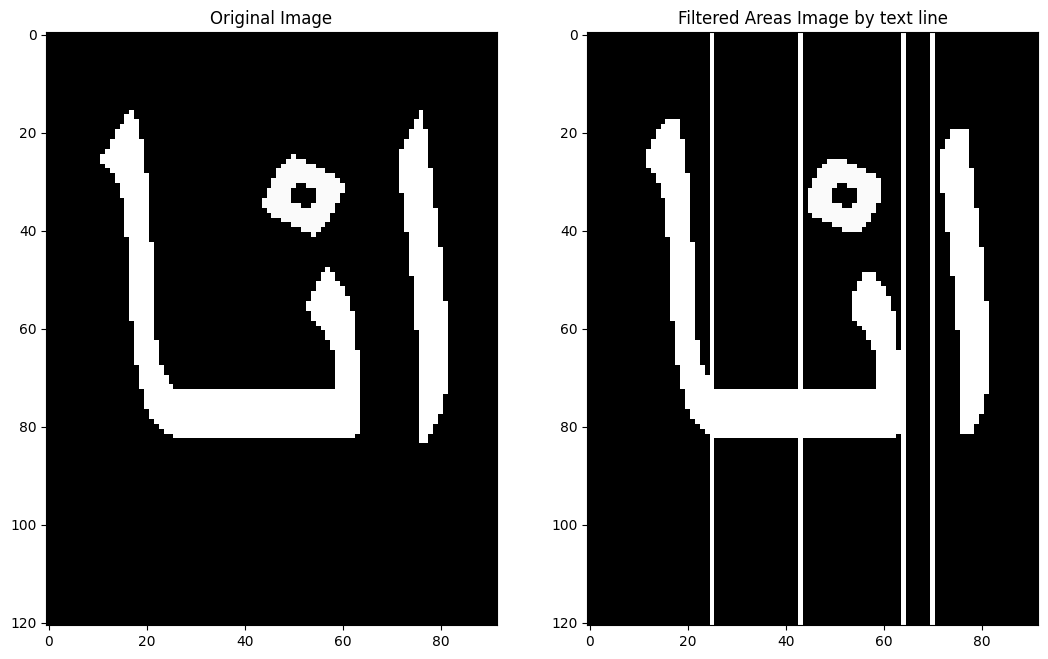

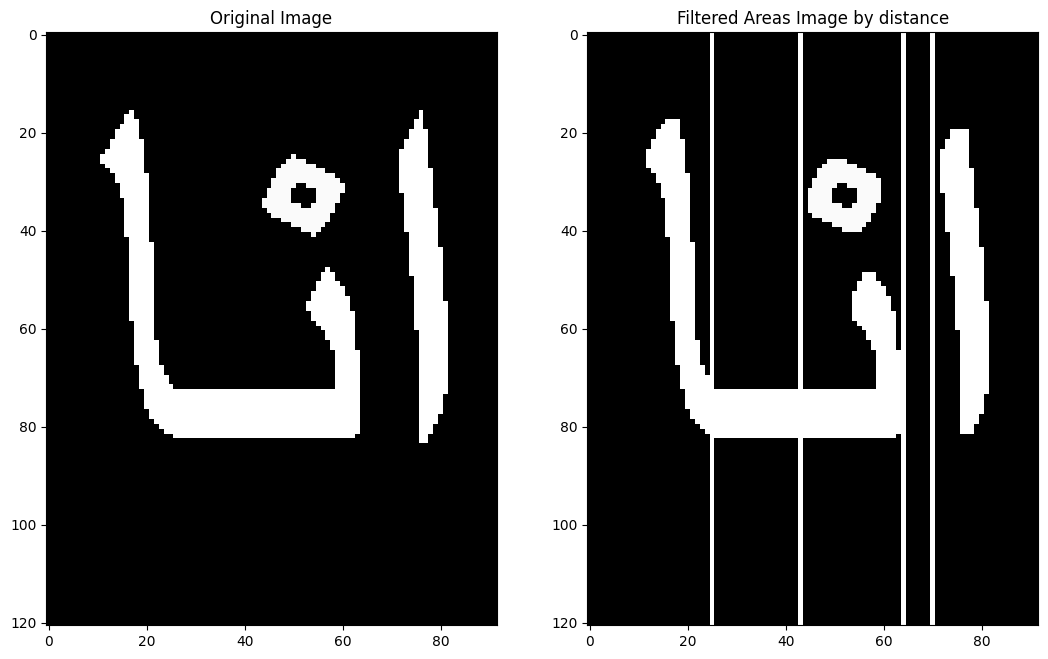

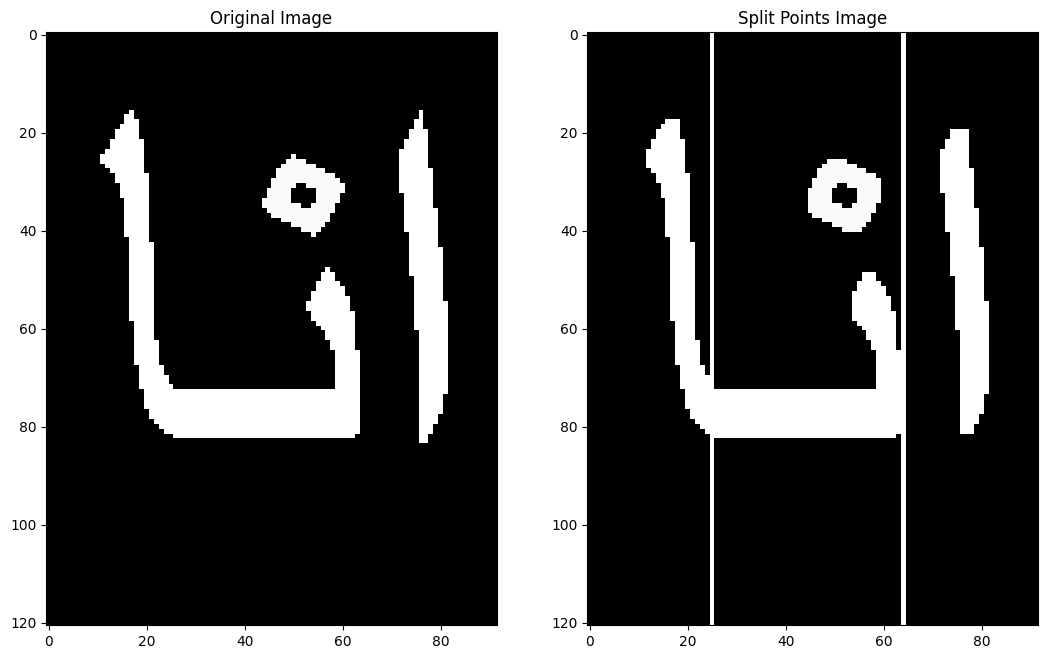

words: 3


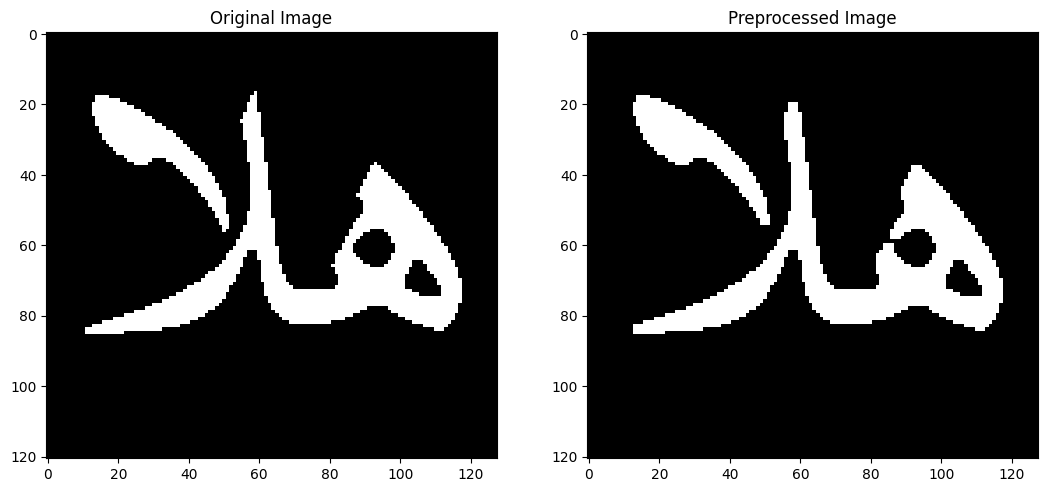

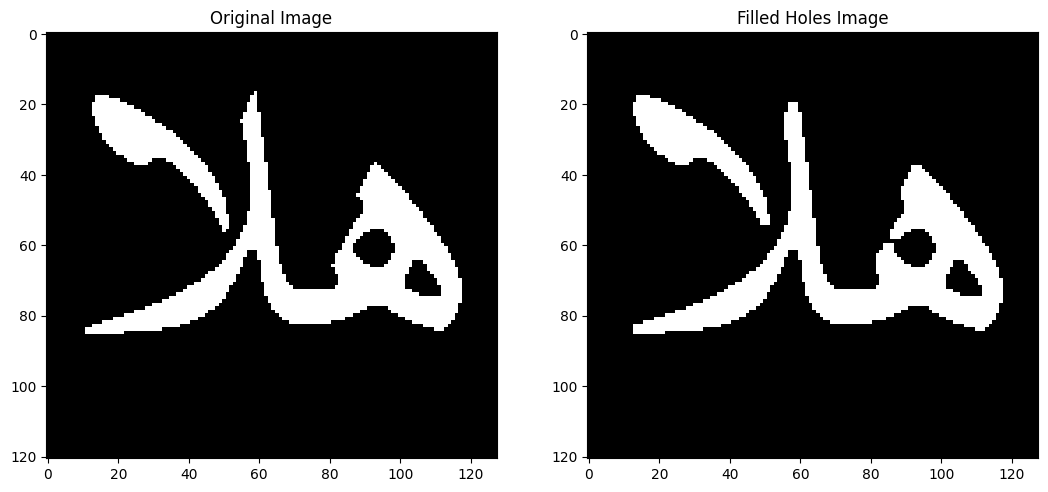

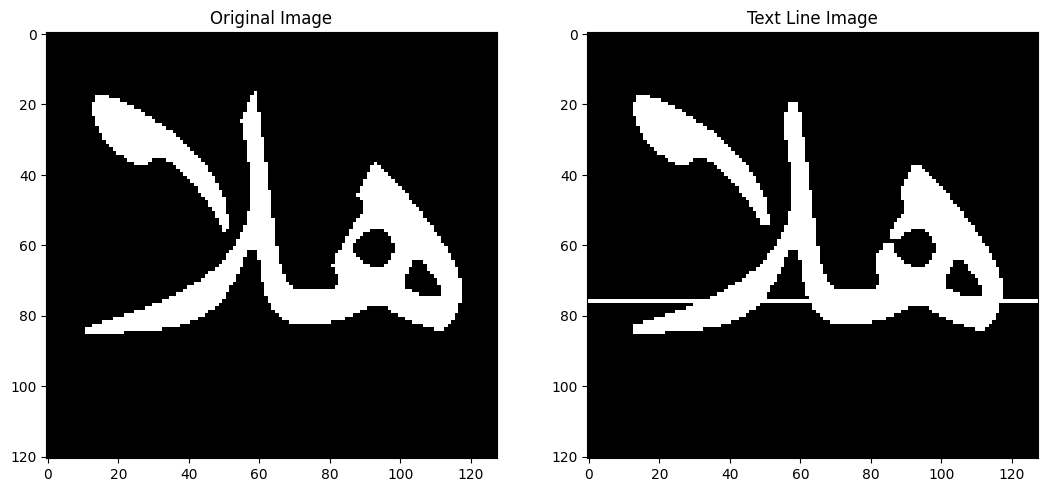

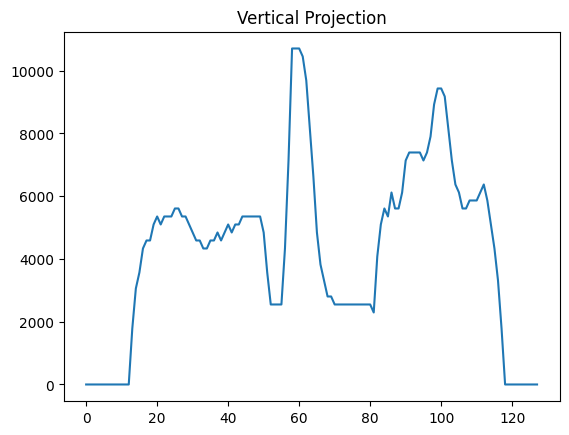

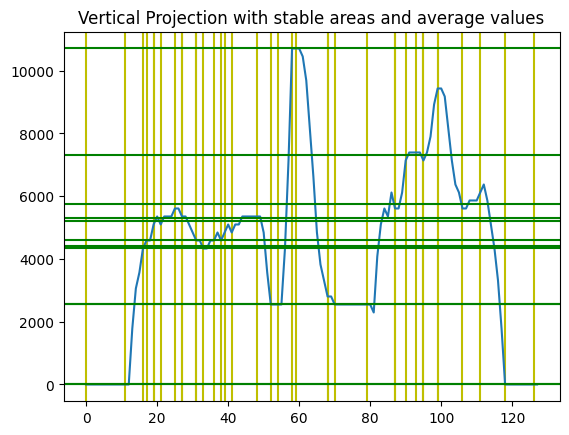

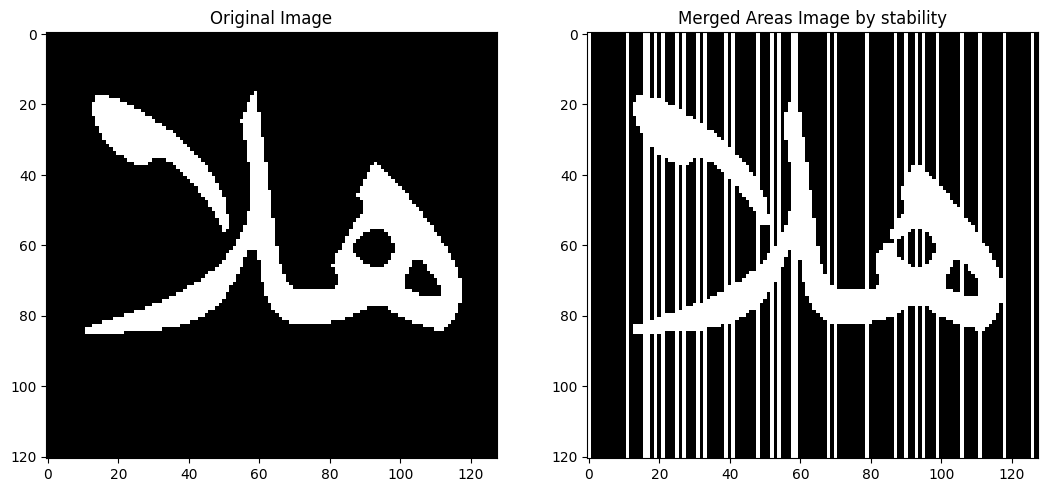

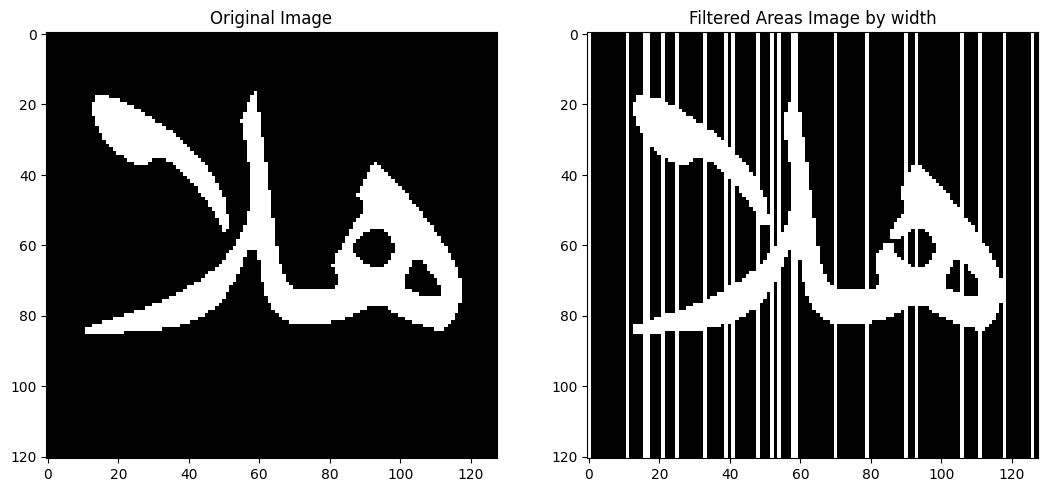

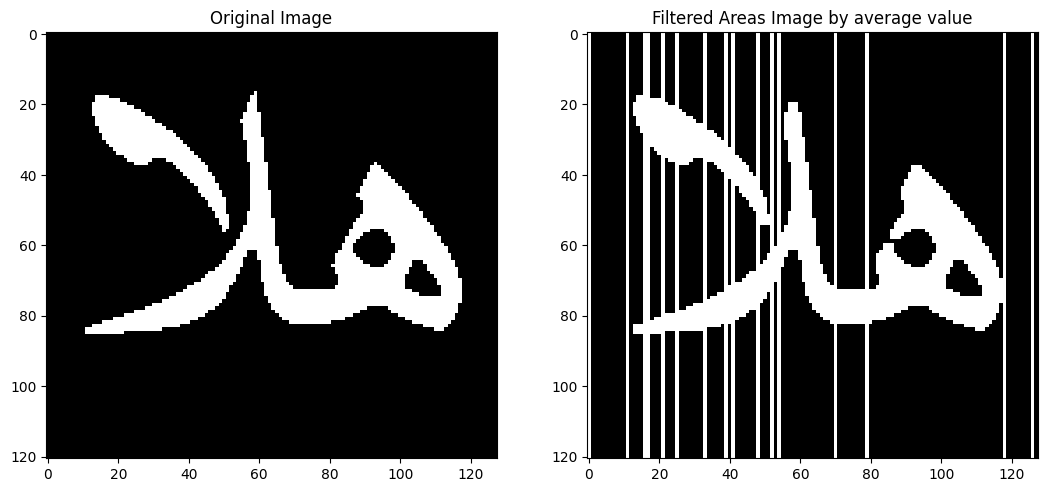

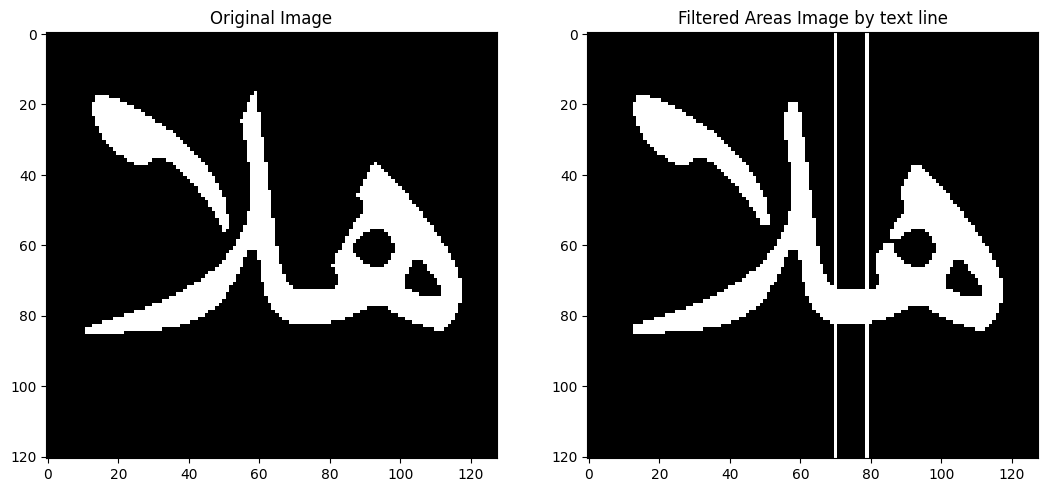

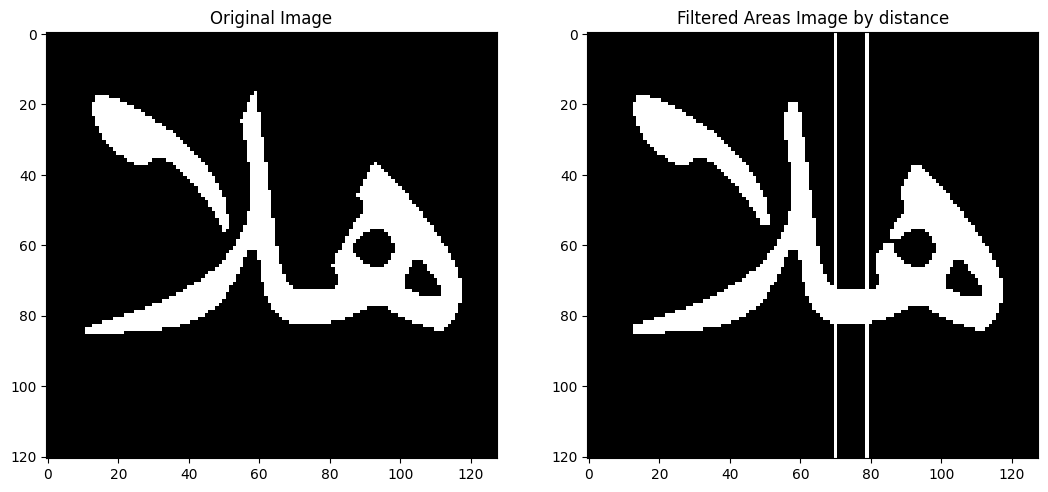

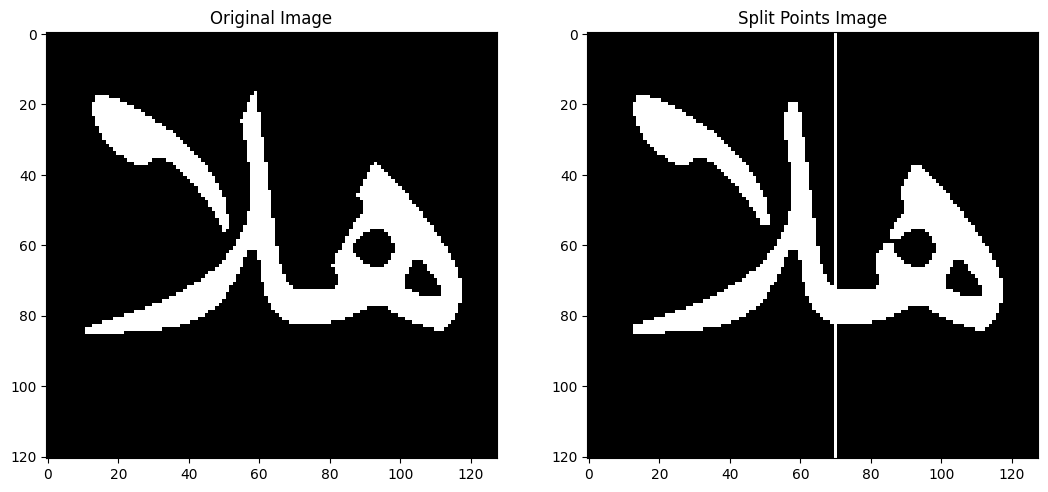

words: 2


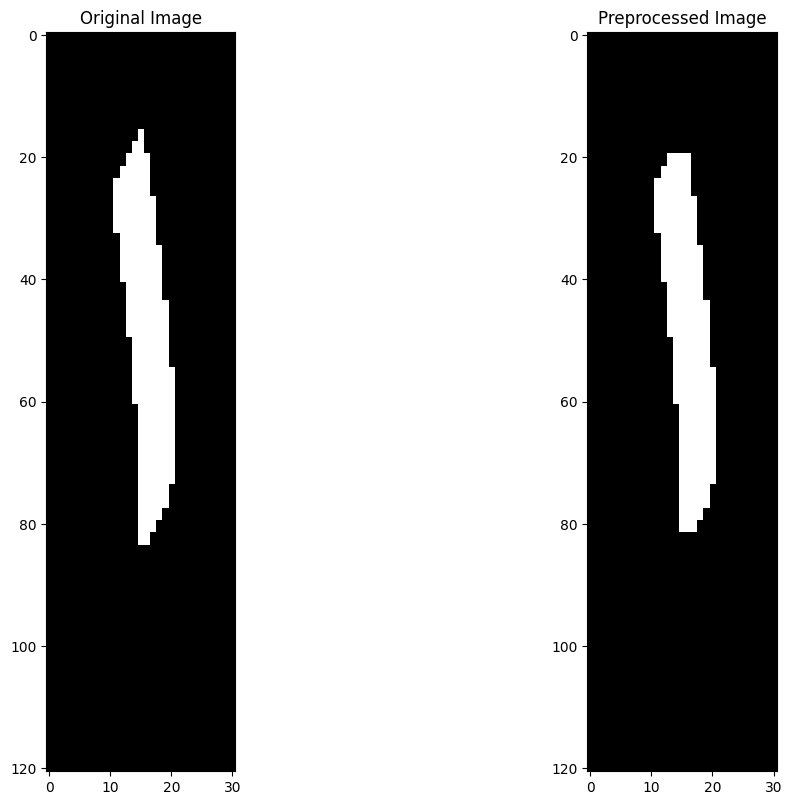

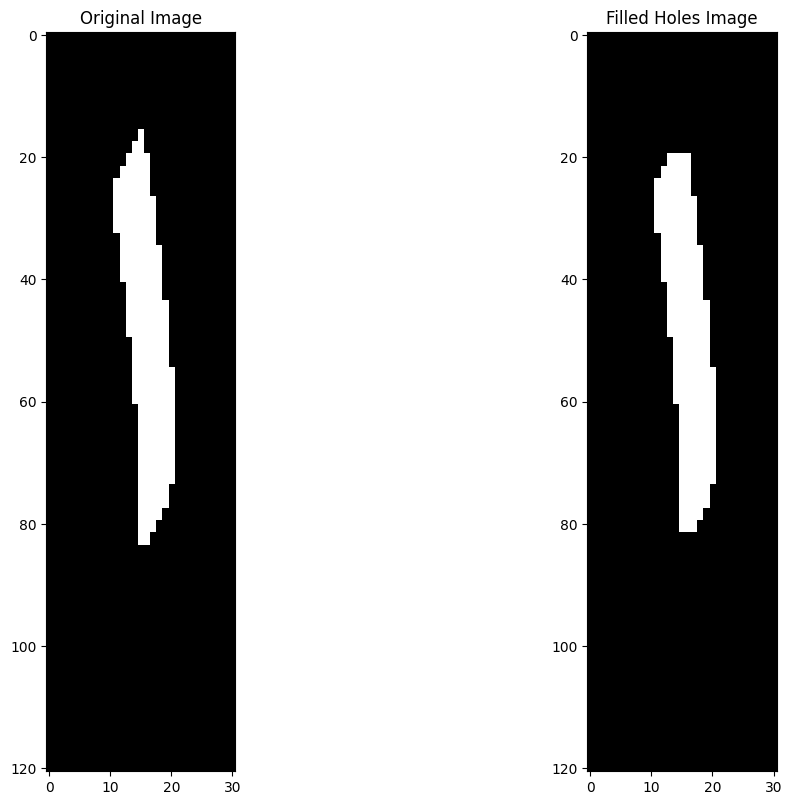

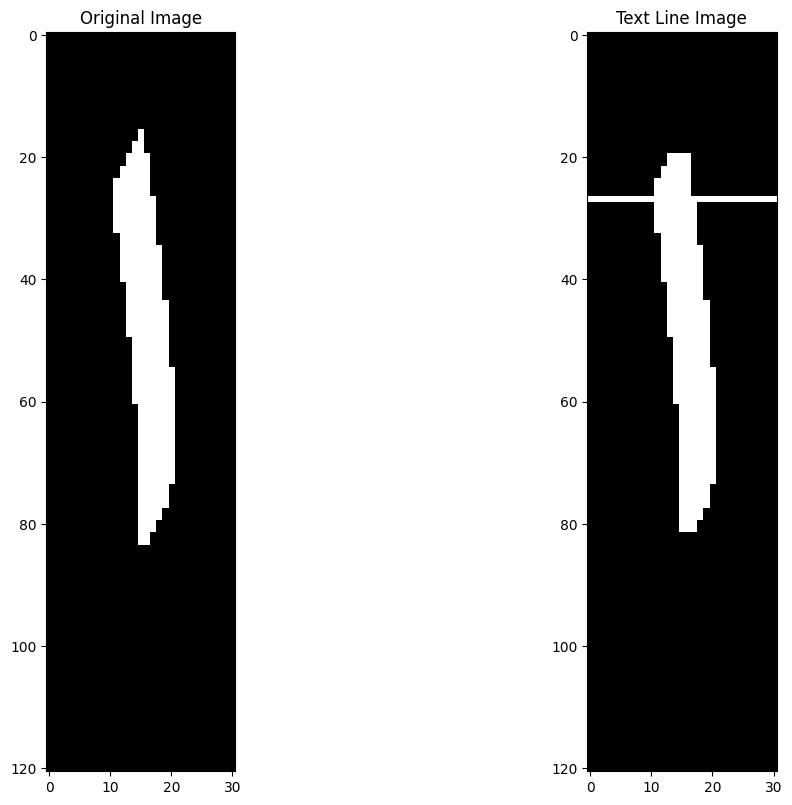

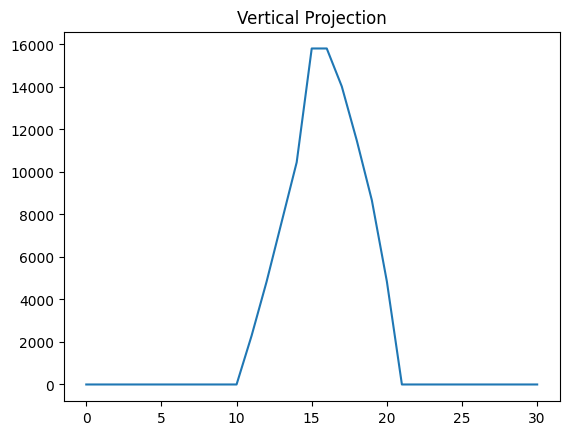

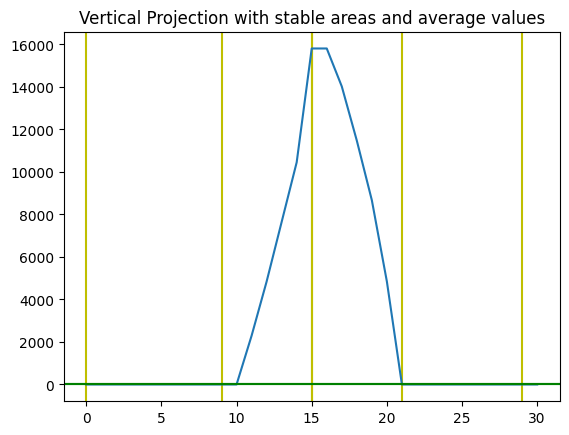

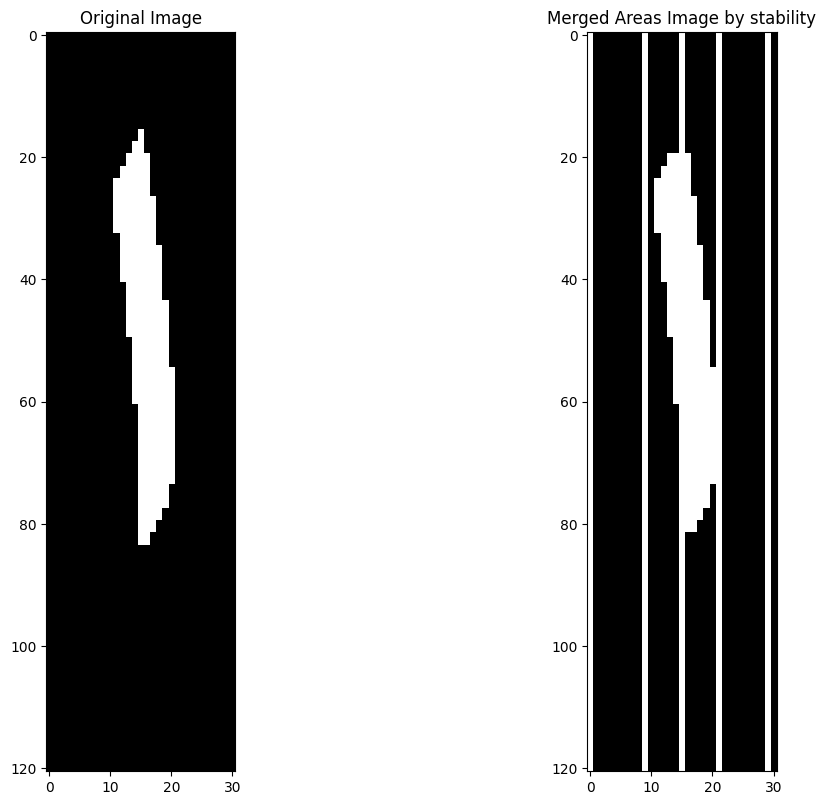

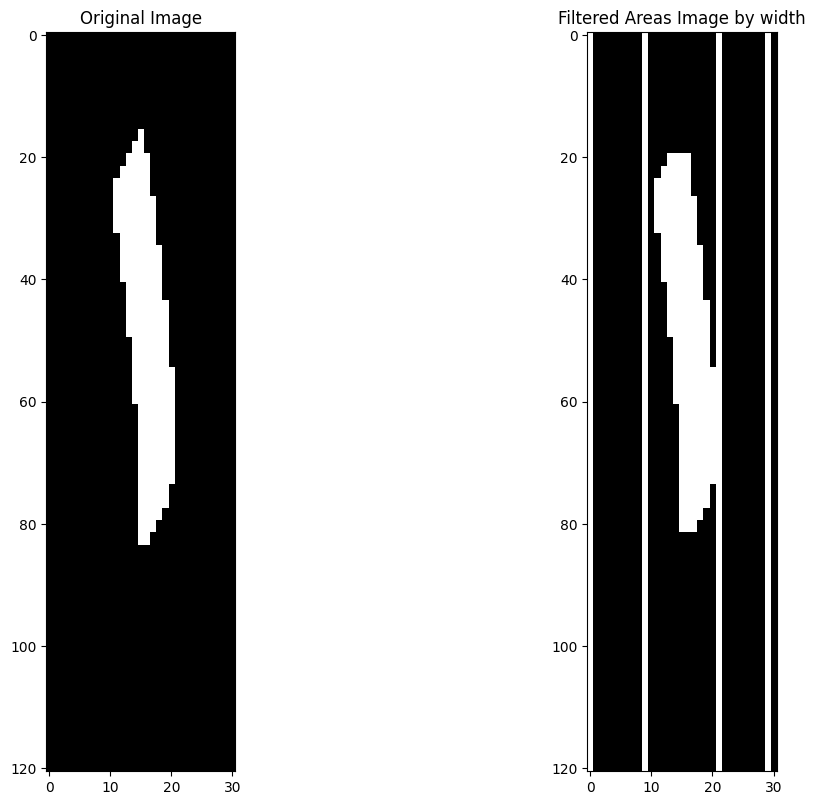

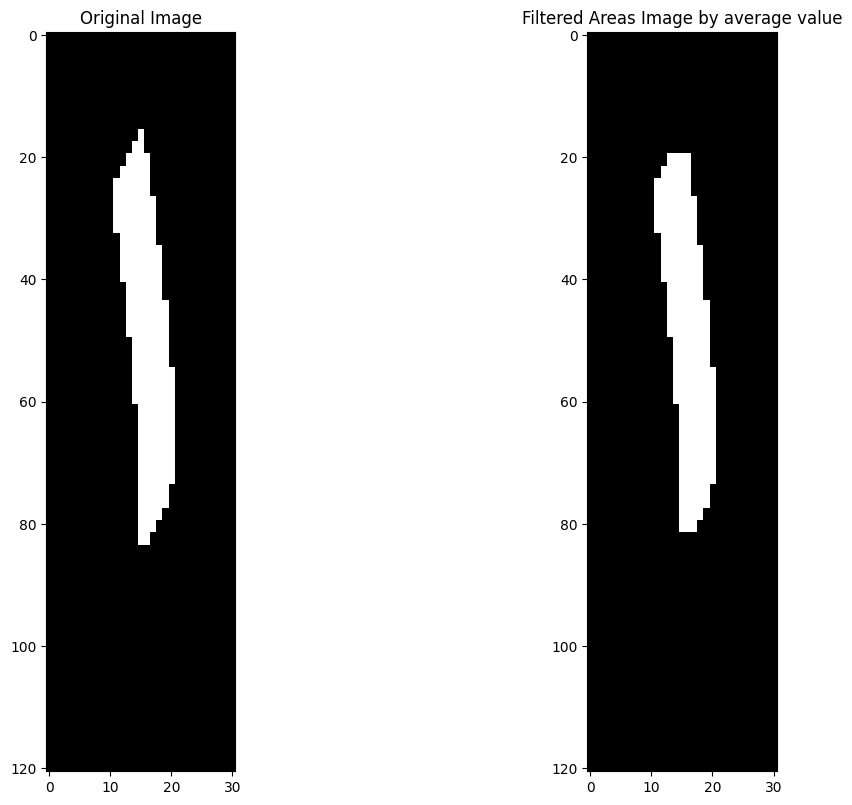

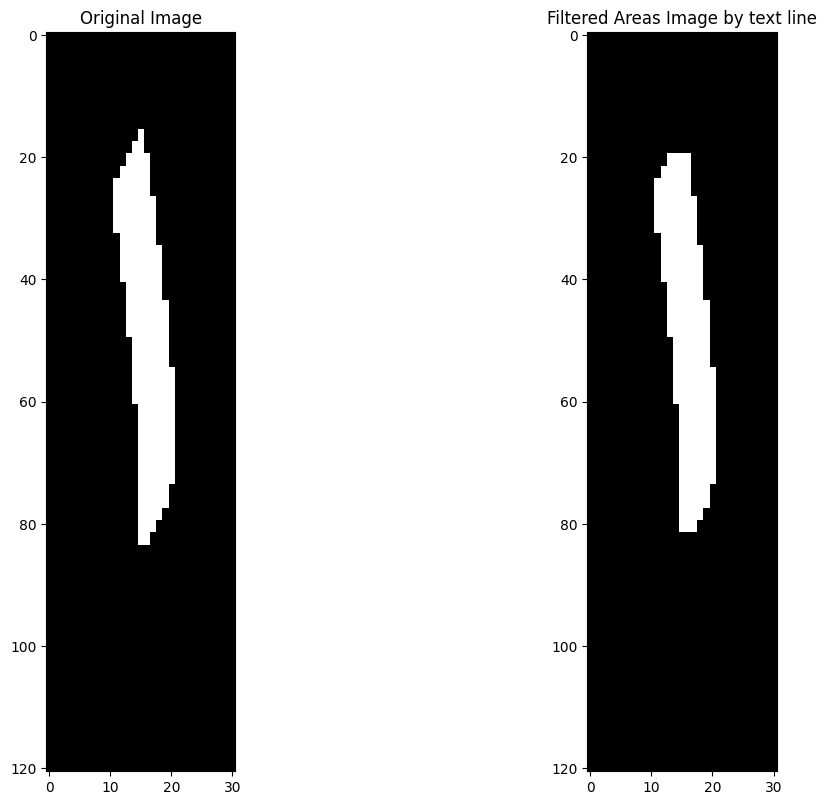

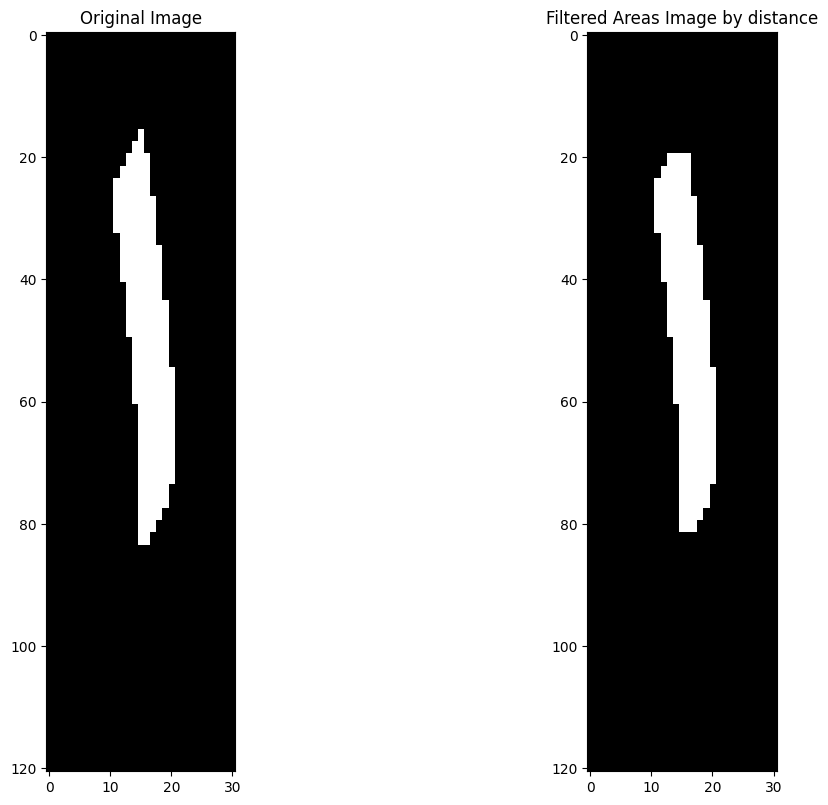

words: 1


In [18]:


lines = Segmentation.segment_save_lines_words('D:/UNI/CCE_sem_8_LAST_YAY_^^/gp2/project/Alfarahifi_org/arabic-ocr/paragraphs_per_user/paragraphs_per_user/user001/com_paragraph.png')
#I have a list of tuples each tuple first entry contains an image of a line and the second entry is the segmented words of that line, i need to save this the folder Trial, ina  file hierarchy that goes line_i/word_j
for i, line in enumerate(lines):
    # Create directory for each line if it doesn't exist
    line_dir = f'Trial/computer_par/line_{i}'
    if not os.path.exists(line_dir):
        os.makedirs(line_dir)

    # Save line image
    #cv.imwrite(f'{line_dir}/line.png', line[0])

    # Save word images
    for j, word in enumerate(line[1]):
        cv.imwrite(f'{line_dir}/word_{j}.png', word)


files = getListOfFiles('Trial/computer_par/line_0')
for j,file in enumerate(files):
    letters = character_segmentation.segment_characters(file)
    filtered_letters = character_segmentation.filter_characters(letters)


    if not os.path.exists(f'Trial/Characters/cmp/word{j}'):
        os.makedirs(f'Trial/Characters/cmp/word{j}')

    for i, word in enumerate(filtered_letters):
        file_path = f'Trial/Characters/cmp/word{j}/char_{i}.png'
        cv.imwrite(file_path, word)



In [32]:

directory_path = 'Trial/Characters/cmp'
list_words = os.listdir(directory_path)

print(list_words)

for i, word_file in enumerate(list_words):
    path = os.path.join(directory_path, word_file)
    for j, image in enumerate(os.listdir(path)):
        image_path = os.path.join(path, image)
        print(image_path)
        
        letter_image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
        
        inverted_image = cv.bitwise_not(letter_image)
        
        save_dir = f'D:/UNI/CCE_sem_8_LAST_YAY_^^/gp2/project/Alfarahifi_org/arabic-ocr/Test/word{i}'        
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        
        save_path = os.path.join(save_dir, f'{image}_{j}.png')
        cv.imwrite(save_path, inverted_image)



['word0', 'word1', 'word2', 'word3', 'word4', 'word5']
Trial/Characters/cmp\word0\char_0.png
Trial/Characters/cmp\word0\char_1.png
Trial/Characters/cmp\word0\char_2.png
Trial/Characters/cmp\word1\char_0.png
Trial/Characters/cmp\word1\char_1.png
Trial/Characters/cmp\word1\char_2.png
Trial/Characters/cmp\word2\char_0.png
Trial/Characters/cmp\word2\char_1.png
Trial/Characters/cmp\word2\char_2.png
Trial/Characters/cmp\word2\char_3.png
Trial/Characters/cmp\word2\char_4.png
Trial/Characters/cmp\word3\char_0.png
Trial/Characters/cmp\word3\char_1.png
Trial/Characters/cmp\word3\char_2.png
Trial/Characters/cmp\word4\char_0.png
Trial/Characters/cmp\word4\char_1.png
Trial/Characters/cmp\word5\char_0.png
Prediction for letter 1: alifBeginning
Prediction for letter 2: gaynMiddle
Prediction for letter 3: alifBeginning
Prediction for letter 4: baEnd
Prediction for letter 5: alifIsolated
أغأبأ
 


In [35]:
dir = 'Test'
list_words = os.listdir(dir)
for file in list_words: 
    path = os.path.join(dir, file)
    Run(path)

Prediction for letter 1: zaMiddle
Prediction for letter 2: mimEnd
Prediction for letter 3: zaMiddle
ظمظ
 
Prediction for letter 1: hamzaEnd
Prediction for letter 2: aynMiddle
Prediction for letter 3: haaBeginning
ئعه
 
Prediction for letter 1: aynEnd
Prediction for letter 2: haMiddle
Prediction for letter 3: haMiddle
Prediction for letter 4: baEnd
Prediction for letter 5: alifIsolated
عححبأ
 
Prediction for letter 1: haaMiddle
Prediction for letter 2: aynMiddle
Prediction for letter 3: alifBeginning
هعأ
 
Prediction for letter 1: gaynEnd
Prediction for letter 2: gaynMiddle
غغ
 
Prediction for letter 1: alifBeginning
أ
 


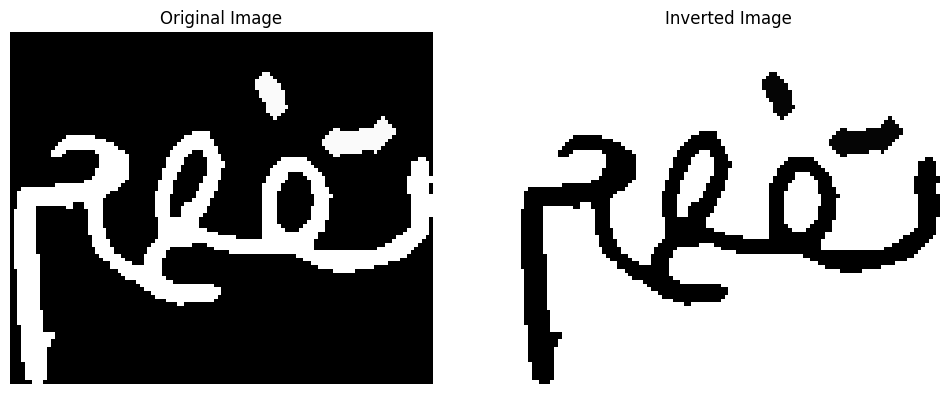

In [8]:
import pytesseract
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

# Load the image
image_path = 'Trial/line_0/word_1.png'
image = Image.open(image_path)

# Invert the image
inverted_image = ImageOps.invert(image.convert('RGB'))

# Perform OCR on the inverted image
extracted_text = pytesseract.image_to_string(inverted_image, lang='ara')

# Print the extracted text
print(extracted_text)

# Display the original and inverted images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original image
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

# Inverted image
ax[1].imshow(inverted_image)
ax[1].set_title('Inverted Image')
ax[1].axis('off')

plt.show()
